In [1]:
import pandas as pd

# List of file paths
file_paths = [
    "spy_data/spy_2021_rth_data.csv",
    "spy_data/spy_2022_rth_data.csv",
    "spy_data/spy_2023_rth_data.csv",
    "spy_data/spy_2024_rth_data.csv",
    
]

# List to store the DataFrames
dataframes = []

# For loop to read each file into a DataFrame
for file_path in file_paths:
    df = pd.read_csv(file_path)
    df['Time'] = pd.to_datetime(df['Unnamed: 0'])
    df.set_index('Time', inplace=True)
    dataframes.append(df)

# Concatenate all dataframes into one
combined_df = pd.concat(dataframes)

# Combine rows with the same index by averaging
# combined_df = combined_df.groupby(combined_df.index).mean()

# Display the first few rows of the combined DataFrame
combined_df.tail()


Unnamed: 0    Open    High      Low   Close  \
Time                                                                        
2024-05-31 15:55:00  2024-05-31 15:55:00  525.84  527.50  525.730  527.35   
2024-05-31 16:00:00  2024-05-31 16:00:00  527.35  528.36  526.600  527.93   
2024-05-31 16:05:00  2024-05-31 16:05:00  527.98  527.99  522.720  527.11   
2024-05-31 16:10:00  2024-05-31 16:10:00  527.37  527.45  522.720  527.42   
2024-05-31 16:15:00  2024-05-31 16:15:00  527.42  527.45  526.892  527.44   

                       Volume  
Time                           
2024-05-31 15:55:00  13611234  
2024-05-31 16:00:00   5692252  
2024-05-31 16:05:00   4940916  
2024-05-31 16:10:00  10628530  
2024-05-31 16:15:00   3097682

In [2]:
combined_df['Date'] = combined_df.index.date

# Load VIX historical data
vix_data = pd.read_csv('VIX_History.csv')

# Convert the DATE column to datetime
vix_data['DATE'] = pd.to_datetime(vix_data['DATE'])

# Merge SPY and VIX data on Date
merged_data = pd.merge(combined_df, vix_data[['DATE', 'CLOSE']], left_on='Date', right_on=vix_data['DATE'].dt.date, how='left')

# Rename the VIX CLOSE column for clarity
merged_data = merged_data.rename(columns={'CLOSE': 'VIX'})

# Drop the redundant DATE column
merged_data = merged_data.drop(columns=['DATE'])

In [3]:
merged_data['Unnamed: 0'] = pd.to_datetime(merged_data['Unnamed: 0'])
merged_data.set_index('Unnamed: 0', inplace=True)
merged_data.head(82)
# print(len(combined_df))

Open     High      Low    Close   Volume        Date  \
Unnamed: 0                                                                     
2021-01-04 09:35:00  358.199  358.331  357.454  357.645   939003  2021-01-04   
2021-01-04 09:40:00  357.673  357.881  357.129  357.758   702729  2021-01-04   
2021-01-04 09:45:00  357.788  358.092  357.549  357.834   731537  2021-01-04   
2021-01-04 09:50:00  357.864  357.948  356.717  357.280   853814  2021-01-04   
2021-01-04 09:55:00  357.309  357.528  356.880  357.184   566734  2021-01-04   
...                      ...      ...      ...      ...      ...         ...   
2021-01-04 16:00:00  352.757  353.338  352.587  352.881  3413993  2021-01-04   
2021-01-04 16:05:00  352.948  353.302  352.442  352.613  1667619  2021-01-04   
2021-01-04 16:10:00  352.709  352.831  352.186  352.575   917036  2021-01-04   
2021-01-04 16:15:00  352.480  352.783  352.310  352.584    98269  2021-01-04   
2021-01-05 09:35:00  353.149  354.132  352.989  353.914   996190  2021-01-05   

                       VIX  
Unnamed: 0                  
2021-01-04 09:35:00  26.97  
2021-01-04 09:40:00  26.97  
2021-01-04 09:45:00  26.97  
2021-01-04 09:50:00  26.97  
2021-01-04 09:55:00  26.97  
...                    ...  
2021-01-04 16:00:00  26.97  
2021-01-04 16:05:00  26.97  
2021-01-04 16:10:00  26.97  
2021-01-04 16:15:00  26.97  
2021-01-05 09:35:00  25.34  

[82 rows x 7 columns]

In [4]:
def calculate_atr(df, period=14):
    # Calculate True Range (TR)
    df['High'] = df['High'].astype(float)
    df['Low'] = df['Low'].astype(float)
    df['Close'] = df['Close'].astype(float)

    df['previous_close'] = df['Close'].shift(1)
    df['tr1'] = df['High'] - df['Low']
    df['tr2'] = abs(df['High'] - df['previous_close'])
    df['tr3'] = abs(df['Low'] - df['previous_close'])
    df['True_Range'] = df[['tr1', 'tr2', 'tr3']].max(axis=1)

    # Calculate ATR
    df['ATR'] = df['True_Range'].rolling(window=period).mean()
    df['ABR'] = df['tr1'].shift(1).rolling(window=10).mean()
    return df

atr_df = calculate_atr(merged_data)

# Display the DataFrame with ATR
print(atr_df.tail(15))

                       Open     High      Low    Close    Volume        Date  \
Unnamed: 0                                                                     
2024-05-31 15:05:00  521.37  521.980  521.370  521.900    615418  2024-05-31   
2024-05-31 15:10:00  521.89  522.220  521.810  522.140    547721  2024-05-31   
2024-05-31 15:15:00  522.13  522.250  521.890  522.160    598569  2024-05-31   
2024-05-31 15:20:00  522.17  522.555  522.130  522.535    647167  2024-05-31   
2024-05-31 15:25:00  522.54  522.750  522.245  522.250   1252466  2024-05-31   
2024-05-31 15:30:00  522.24  522.660  522.000  522.470   1059689  2024-05-31   
2024-05-31 15:35:00  522.47  522.660  522.416  522.590    697333  2024-05-31   
2024-05-31 15:40:00  522.59  523.920  522.470  523.810   1316320  2024-05-31   
2024-05-31 15:45:00  523.82  524.690  523.740  524.665   1898192  2024-05-31   
2024-05-31 15:50:00  524.67  526.160  524.560  525.845   5658868  2024-05-31   
2024-05-31 15:55:00  525.84  527.500  52

In [5]:
atr_df["Open"] = atr_df["Open"].astype(float)
atr_df["High"] = atr_df["High"].astype(float)
atr_df["Low"] = atr_df["Low"].astype(float)
atr_df["Close"] = atr_df["Close"].astype(float)
atr_df["ATR"] = atr_df["ATR"].astype(float)
atr_df["ABR"] = atr_df["ABR"].astype(float)
# Filter the data for May 2024

In [6]:
# List of columns to drop
columns_to_drop = ['Volume', 'previous_close', 'tr2', 'tr3', 'True_Range']

# Drop the columns
atr_df = atr_df.drop(columns=columns_to_drop)

In [7]:
import pandas as pd
df = pd.DataFrame(atr_df)
if 'label' not in df.columns:
    df['label'] = 0
if 'highlight' not in df.columns:
    df['highlight'] = False
    
print(df.head(10))
print(len(df))
for idx, row in enumerate(df.itertuples(index=True, name='Pandas')):
    # print(f"Before updating label: Index {row.Index}, Label {atr_df.at[row.Index, 'label']}")
    # atr_df.at[row.Index, 'label'] = 1.0
    # print(f"After updating label: Index {row.Index}, Label {atr_df.at[row.Index, 'label']}")


    if pd.isna(row.ATR):
        df.at[row.Index, 'label'] = 0
        # print(row.Index, row.Open, row.High, row.Low, row.Close, row.ATR, row.label)
        continue
    # highlight the large bar
    if pd.isna(row.ABR) or row.tr1 < 1.05* row.ABR:
        df.at[row.Index, 'highlight'] = False
        df.at[row.Index, 'label'] = 0
    
    elif row.tr1 >= 1.05*row.ABR:
        df.at[row.Index, 'highlight'] = True
        
    two_atr = row.ATR * 1.0
    pos_target = row.Close + two_atr
    neg_target = row.Close - two_atr

    label = 0
    # Get the close price of the next row
    for i in range(1, (len(df) - idx)):
        next_row = df.iloc[idx + i]
        if next_row.High >= pos_target and next_row.Low <= neg_target:
            if next_row.Close > next_row.Open:
                label = 1
            elif next_row.Close < next_row.Open:
                label = -1
            break
        elif next_row.High >= pos_target:
            label = 1
            break
        elif next_row.Low <= neg_target:
            label = -1
            break
    df.at[row.Index, 'label'] = label
    # print(row.Index, row.Open, row.High, row.Low, row.Close, row.ATR, row.label)
print("after change")
print(df.head(10))

                        Open     High      Low    Close        Date    VIX  \
Unnamed: 0                                                                   
2021-01-04 09:35:00  358.199  358.331  357.454  357.645  2021-01-04  26.97   
2021-01-04 09:40:00  357.673  357.881  357.129  357.758  2021-01-04  26.97   
2021-01-04 09:45:00  357.788  358.092  357.549  357.834  2021-01-04  26.97   
2021-01-04 09:50:00  357.864  357.948  356.717  357.280  2021-01-04  26.97   
2021-01-04 09:55:00  357.309  357.528  356.880  357.184  2021-01-04  26.97   
2021-01-04 10:00:00  357.242  357.518  356.689  356.931  2021-01-04  26.97   
2021-01-04 10:05:00  356.970  357.164  356.383  356.601  2021-01-04  26.97   
2021-01-04 10:10:00  356.621  356.810  356.192  356.285  2021-01-04  26.97   
2021-01-04 10:15:00  356.329  356.600  355.972  356.175  2021-01-04  26.97   
2021-01-04 10:20:00  356.214  356.542  355.972  356.075  2021-01-04  26.97   

                       tr1  ATR  ABR  label  highlight  
Unname

In [8]:
print("\nRows where the label is -1:")
rows_with_label_0 = df[df['label'] == 0]
print(len(rows_with_label_0))


Rows where the label is -1:
16


In [9]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import torch
from torch.utils.data import Dataset, DataLoader

# # Assuming df is your DataFrame with OHLC data, 'Date' column, and 'label' column
# df['Date'] = pd.to_datetime(df['Unnamed: 0'])
# df = df.set_index('Date')

# Create sequences of past twenty days' OHLC data
dates = []
highlights = []
def generate_test_datasets(df, seq_len):
    features = []
    labels = []
    
    for i in range(len(df) - seq_len):
        features.append(df[['Open', 'High', 'Low', 'Close']].iloc[i:i + seq_len].values)
        labels.append(df['label'].iloc[i + seq_len])
        if seq_len == 20:
            dates.append(df.index[i + seq_len])
            highlights.append(df['highlight'].iloc[i + seq_len])
    
    features = np.array(features)
    labels = np.array(labels)
    scaler = StandardScaler()
    for i in range(features.shape[0]):
        features[i] = scaler.fit_transform(features[i])
    
    labels = np.where(labels == -1, 0, 1)
    return features, labels

# Normalize the features within each data point using Standard Scaler

features_20, labels_20 = generate_test_datasets(df, 20)
features_20 = torch.tensor(features_20, dtype=torch.float32)
labels_20 = torch.tensor(labels_20, dtype=torch.float32)

features_30, labels_30 = generate_test_datasets(df, 30)
features_30 = torch.tensor(features_30, dtype=torch.float32)
labels_30 = torch.tensor(labels_30, dtype=torch.float32)

features_40, labels_40 = generate_test_datasets(df, 40)
features_40 = torch.tensor(features_40, dtype=torch.float32)
labels_40 = torch.tensor(labels_40, dtype=torch.float32)

features_50, labels_50 = generate_test_datasets(df, 50)
features_50 = torch.tensor(features_50, dtype=torch.float32)
labels_50 = torch.tensor(labels_50, dtype=torch.float32)

features_60, labels_60 = generate_test_datasets(df, 60)
features_60 = torch.tensor(features_60, dtype=torch.float32)
labels_60 = torch.tensor(labels_60, dtype=torch.float32)

dates = np.array(dates)
highlights = np.array(highlights)



In [10]:
print(features_50[0])

tensor([[ 1.8723e+00,  1.8515e+00,  1.8188e+00,  1.7920e+00],
        [ 1.6799e+00,  1.6824e+00,  1.6991e+00,  1.8348e+00],
        [ 1.7220e+00,  1.7617e+00,  1.8538e+00,  1.8636e+00],
        [ 1.7498e+00,  1.7076e+00,  1.5474e+00,  1.6537e+00],
        [ 1.5468e+00,  1.5497e+00,  1.6074e+00,  1.6173e+00],
        [ 1.5223e+00,  1.5459e+00,  1.5371e+00,  1.5215e+00],
        [ 1.4228e+00,  1.4129e+00,  1.4244e+00,  1.3965e+00],
        [ 1.2952e+00,  1.2799e+00,  1.3541e+00,  1.2768e+00],
        [ 1.1884e+00,  1.2009e+00,  1.2731e+00,  1.2351e+00],
        [ 1.1464e+00,  1.1791e+00,  1.2731e+00,  1.1972e+00],
        [ 1.1061e+00,  1.1183e+00,  1.2061e+00,  1.2480e+00],
        [ 1.1551e+00,  1.1359e+00,  1.1111e+00,  1.0745e+00],
        [ 9.9093e-01,  9.3485e-01,  1.0511e+00,  1.0105e+00],
        [ 9.2072e-01,  1.0348e+00,  1.0794e+00,  1.0650e+00],
        [ 9.8033e-01,  9.1305e-01,  8.4008e-01,  7.6233e-01],
        [ 6.9691e-01,  6.6876e-01,  4.2473e-01,  4.2177e-01],
        

In [11]:
class TimeSeriesDataset(Dataset):
    def __init__(self, features, labels):
        self.features = features
        self.labels = labels

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]

dataset_20 = TimeSeriesDataset(features_20, labels_20)
dataset_30 = TimeSeriesDataset(features_30, labels_30)
dataset_40 = TimeSeriesDataset(features_40, labels_40)
dataset_50 = TimeSeriesDataset(features_50, labels_50)
dataset_60 = TimeSeriesDataset(features_60, labels_60)

In [12]:
import pandas as pd
import numpy as np

# Assuming merged_data already includes the necessary data
df['Date'] = pd.to_datetime(df['Date'])
merged_data_testing = df[(df['Date'] >= pd.to_datetime('2022-01-01')) & (df['Date'] < pd.to_datetime('2024-01-01'))]
# Calculate the number of samples needed for 50 days based on the given distribution
total_days = 50
mid_vix_percentage = 0.71396396
low_vix_percentage = 0.22409910
high_vix_percentage = 0.06193694

mid_vix_days = int(total_days * mid_vix_percentage)
low_vix_days = int(total_days * low_vix_percentage)
high_vix_days = int(total_days * high_vix_percentage)

# Ensure the total number of days sums to 50
remaining_days = total_days - (mid_vix_days + low_vix_days + high_vix_days)
if remaining_days > 0:
    mid_vix_days += remaining_days

# Sample unique dates for each category
mid_vix_dates = np.random.choice(
    merged_data_testing[(merged_data_testing['VIX'] >= 15) & (merged_data_testing['VIX'] < 30)]['Date'].unique(),
    mid_vix_days,
    replace=False
)
low_vix_dates = np.random.choice(
    merged_data_testing[merged_data_testing['VIX'] < 15]['Date'].unique(),
    low_vix_days,
    replace=False
)
high_vix_dates = np.random.choice(
    merged_data_testing[merged_data_testing['VIX'] >= 30]['Date'].unique(),
    high_vix_days,
    replace=False
)
# Filter the data for the selected dates
mid_vix_data_indices = merged_data_testing[merged_data_testing['Date'].isin(mid_vix_dates)].index.tolist()
low_vix_data_indices = merged_data_testing[merged_data_testing['Date'].isin(low_vix_dates)].index.tolist()
high_vix_data_indices = merged_data_testing[merged_data_testing['Date'].isin(high_vix_dates)].index.tolist()

# Combine the indices
test_indices = mid_vix_data_indices + low_vix_data_indices + high_vix_data_indices

specific_date = pd.to_datetime('2022-04-01')
specific_date_index = merged_data_testing[merged_data_testing['Date'] == specific_date].index.tolist()

# Combine the indices including the specific date
test_indices += specific_date_index
print(test_indices)


[Timestamp('2022-01-10 09:35:00'), Timestamp('2022-01-10 09:40:00'), Timestamp('2022-01-10 09:45:00'), Timestamp('2022-01-10 09:50:00'), Timestamp('2022-01-10 09:55:00'), Timestamp('2022-01-10 10:00:00'), Timestamp('2022-01-10 10:05:00'), Timestamp('2022-01-10 10:10:00'), Timestamp('2022-01-10 10:15:00'), Timestamp('2022-01-10 10:20:00'), Timestamp('2022-01-10 10:25:00'), Timestamp('2022-01-10 10:30:00'), Timestamp('2022-01-10 10:35:00'), Timestamp('2022-01-10 10:40:00'), Timestamp('2022-01-10 10:45:00'), Timestamp('2022-01-10 10:50:00'), Timestamp('2022-01-10 10:55:00'), Timestamp('2022-01-10 11:00:00'), Timestamp('2022-01-10 11:05:00'), Timestamp('2022-01-10 11:10:00'), Timestamp('2022-01-10 11:15:00'), Timestamp('2022-01-10 11:20:00'), Timestamp('2022-01-10 11:25:00'), Timestamp('2022-01-10 11:30:00'), Timestamp('2022-01-10 11:35:00'), Timestamp('2022-01-10 11:40:00'), Timestamp('2022-01-10 11:45:00'), Timestamp('2022-01-10 11:50:00'), Timestamp('2022-01-10 11:55:00'), Timestamp('20

In [13]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [27]:
import torch
import torch.nn as nn

class LSTMModel(nn.Module):
    def __init__(self, hidden_dim=256, num_layers=2):
        super().__init__()
        self.input_projection = nn.Linear(4, hidden_dim // 4)
        self.act = nn.ReLU()
        self.r = nn.LSTM(hidden_dim // 4, hidden_dim, num_layers, batch_first=True, bidirectional=False, dropout=0.1)
        self.l = nn.Linear(1*num_layers*hidden_dim, 1)
        self.init_weights()

    def init_weights(self):
        for name, param in self.r.named_parameters():
            if 'bias' in name:
                 nn.init.constant_(param, 0.0)
            elif 'weight_ih' in name:
                 nn.init.kaiming_normal_(param)
            elif 'weight_hh' in name:
                 nn.init.orthogonal_(param)

    def forward(self, x):
        batch_size = x.shape[0]
        x = self.act(self.input_projection(x))
        lstm_out, (h_n, c_n) = self.r(x) # initial state 
        x = h_n.permute(1, 0, 2).flatten(1)
        x = self.l(x)
        return x

# input_size = 4
# hidden_size = 128  # Adjust as necessary
# num_layers = 2
# output_size = 1
# mlp_output_size = 32
# dropout_prob = 0.1



In [28]:
import torch
from scipy.stats import gmean
sequence_lengths = [20, 30, 40, 50, 60]
datasets = {
    20: dataset_20,
    30: dataset_30,
    40: dataset_40,
    50: dataset_50,
    60: dataset_60
}

# Define the corresponding model paths
model_paths = {
    20: 'lstm_model_2020_20sequence.pth',
    30: 'lstm_model_2020_30sequence.pth',
    40: 'lstm_model_2020_40sequence.pth',
    50: 'lstm_model_2020_50sequence.pth',
    60: 'lstm_model_2020_60sequence.pth'
}

def make_predictions(model, model_path, test_dataset):
    # Load the model
    model.load_state_dict(torch.load(model_path))
    model = model.to(device)
    model.eval()
    
    test_indices_all = [j for j, (date) in enumerate(dates) if (date in test_indices)]
    # print(test_indices_all)
    test_subset = torch.utils.data.Subset(test_dataset, test_indices_all)
    # Create a DataLoader for the test dataset
    test_loader = DataLoader(test_subset, batch_size=32, shuffle=False)
    
    all_predictions = []
    test_true_labels = []
    
    with torch.no_grad():
        for features, labels in test_loader:
            features = features.to(device)  # Move features to device
            labels = labels.to(device)  # Move labels to device
            outputs = torch.sigmoid(model(features))
            all_predictions.extend(outputs.cpu().numpy())
            test_true_labels.extend(labels.cpu().numpy())
    
    return np.array(all_predictions), np.array(test_true_labels)
  
all_model_predictions = []

for seq_len in sequence_lengths:
    model_path = model_paths[seq_len]
    dataset = datasets[seq_len]
    
    # Initialize your model here, for example:
    model = LSTMModel(128).to(device)  # Replace with your actual model class
    
    predictions, true_labels = make_predictions(model, model_path, dataset)
    all_model_predictions.append(predictions)
    
average_predictions = gmean(all_model_predictions, axis=0)

print(average_predictions.max())
print(average_predictions.min())
binary_predictions = np.where(average_predictions >= 0.9, 1, np.where(average_predictions <= 0.1, -1, 0))
# binary_predictions = np.where(all_predictions >= 0.5, 1, -1)


# Filter the data for the testing indices
test_data = df.loc[test_indices]

# Assuming `all_predictions` and `all_labels` are already defined
test_data['Predicted_Label'] = binary_predictions


# evaluate perfomance
counter = 0
correct_counter = 0
unique_dates = test_data['Date'].unique()
for unique_date in unique_dates:
    # Filter data for the current date
    daily_data = test_data[test_data['Date'] == unique_date]
    for date, row in daily_data.iterrows():
      if (row['Predicted_Label'] == 1 or row['Predicted_Label'] == -1) and row['highlight']:
        counter += 1
        if row['Predicted_Label'] == row['label']:
          correct_counter += 1
        
accuracy = 100 * correct_counter / counter
print(f'Accuracy: {accuracy: .2f}%')
      
# Calculate accuracy
#   Calculate precision
# true_positives = np.sum((binary_predictions == 1) & (all_labels_test == 1))
# false_positives = np.sum((binary_predictions == 1) & (all_labels_test != 1))
# true_negatives = np.sum((binary_predictions == -1) & (all_labels_test == -1))
# false_negatives = np.sum((binary_predictions == -1) & (all_labels_test != -1))
# precision = 100 * true_positives / (true_positives + false_positives)
# precision_down = 100 * true_negatives / (true_negatives + false_negatives)
# accuracy = 100 * np.mean(binary_predictions == all_labels_test)
# print(f'Accuracy: {accuracy: .2f}%, Precision: {precision: .2f}%, Precision -1: {precision_down: .2f}%')


# Print some sample predictions
# print('Sample Predictions:')
# for i in range(min(10, len(binary_predictions))):
#     print(f'Predicted: {binary_predictions[i]}, Actual: {all_labels_test[i]}')



0.9934575
0.0046533663
Accuracy:  52.42%


In [26]:
print(counter)

124


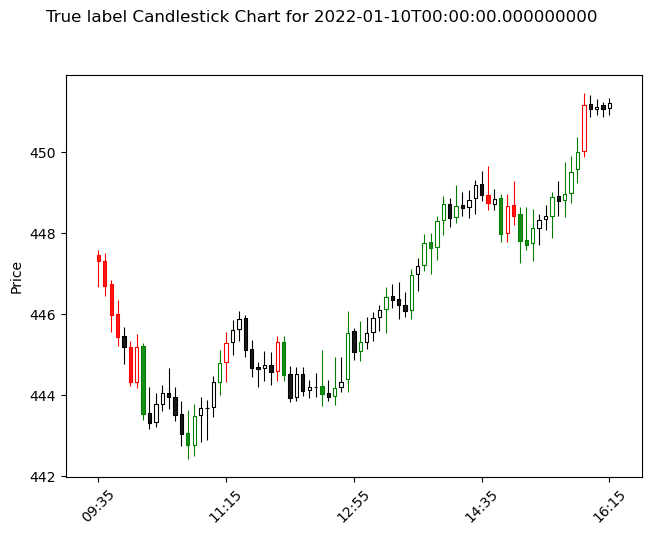

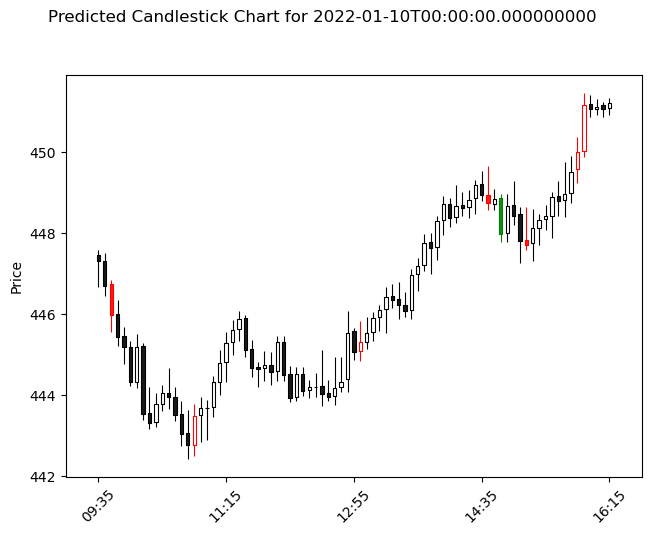

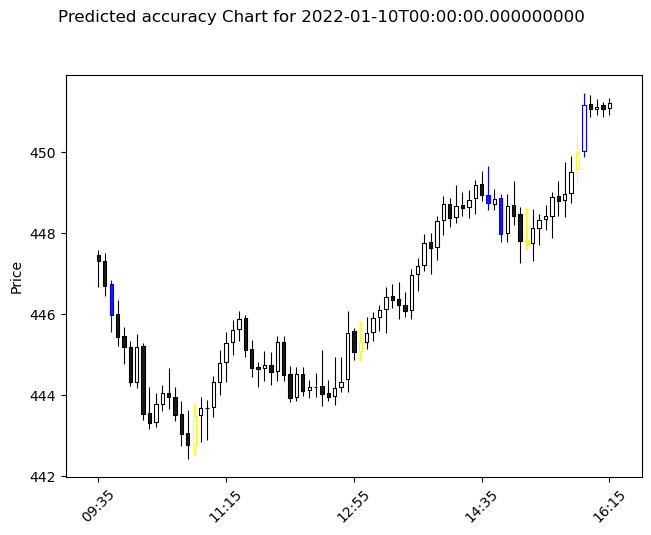

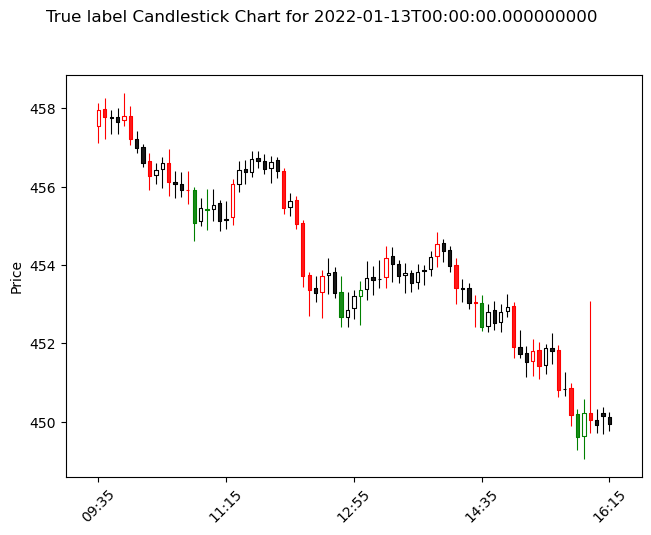

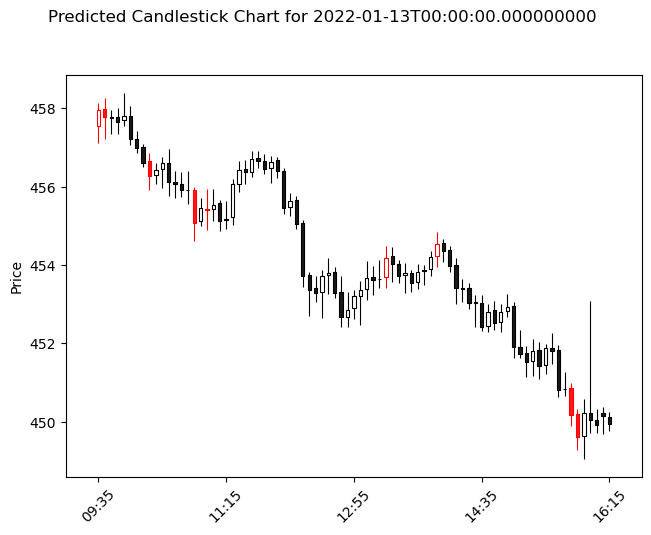

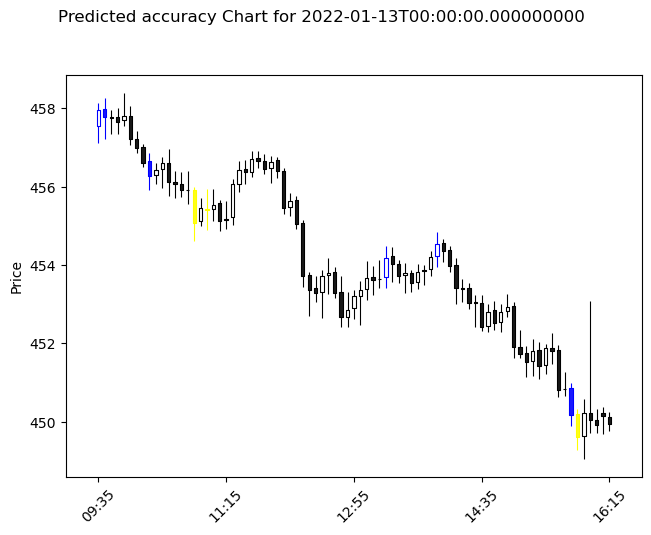

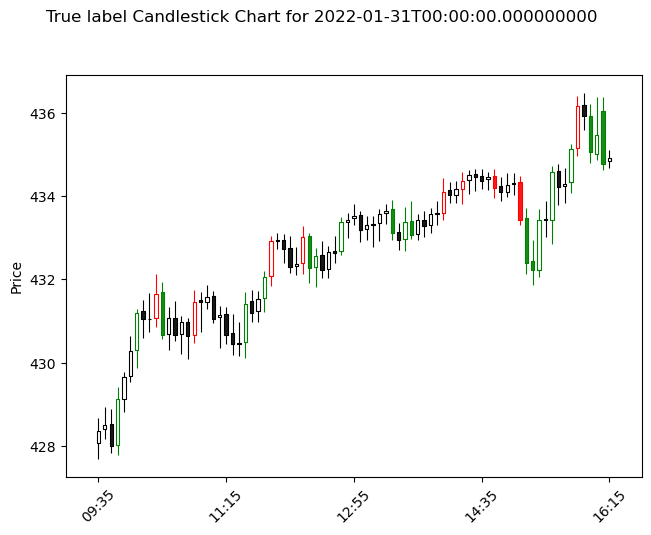

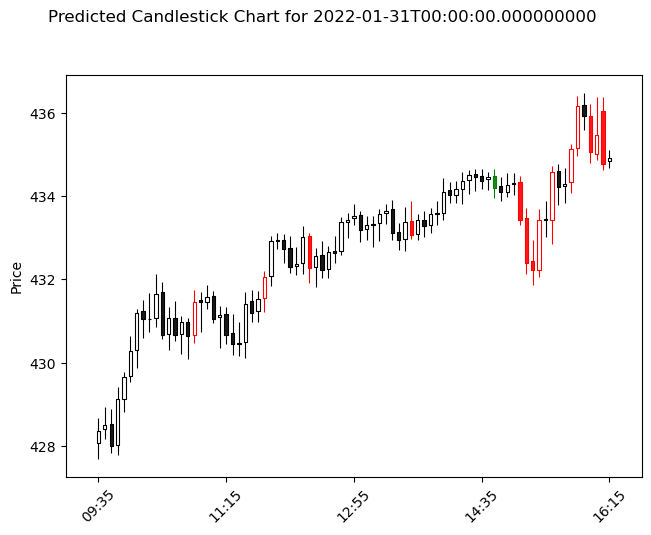

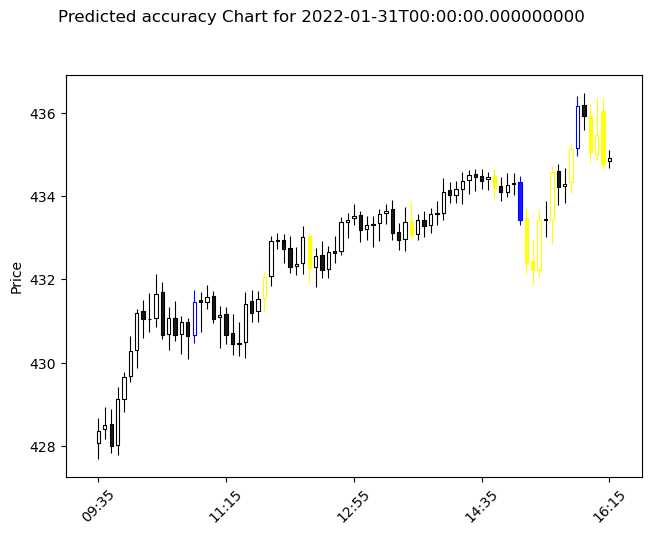

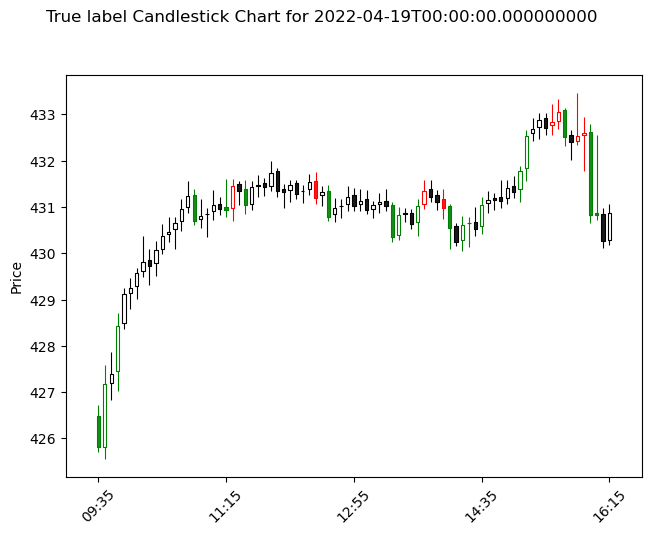

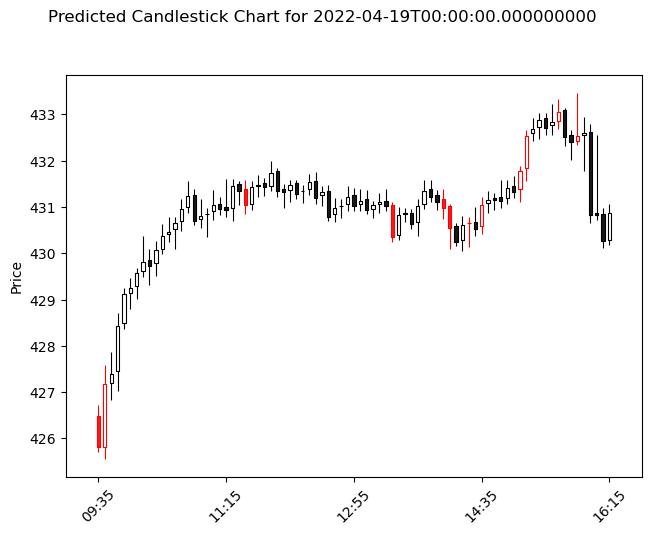

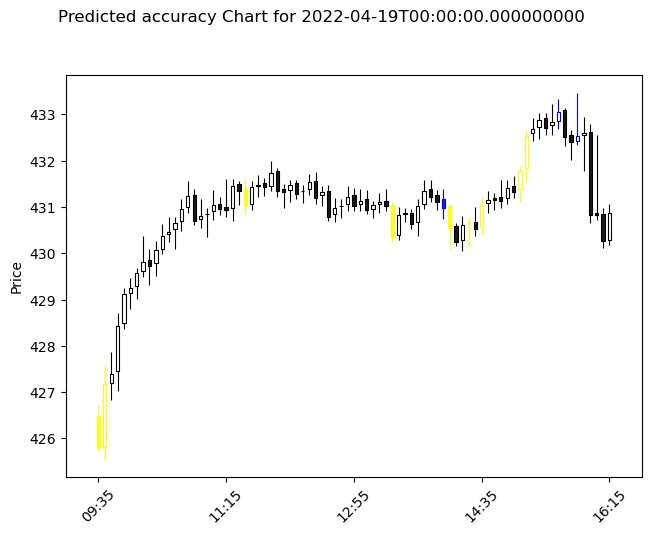

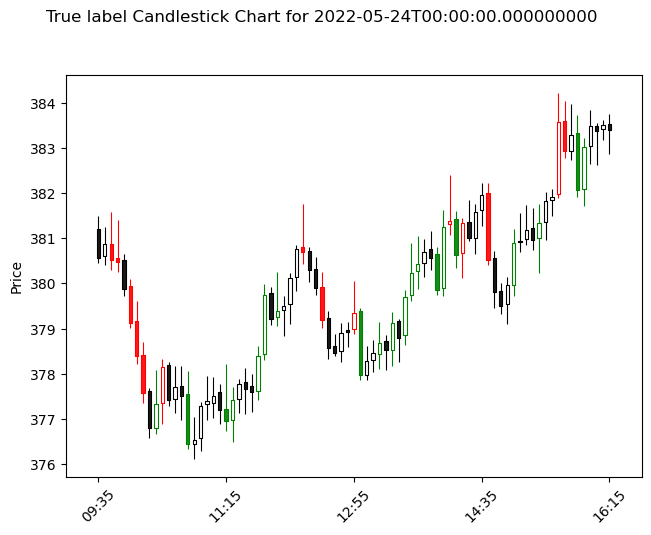

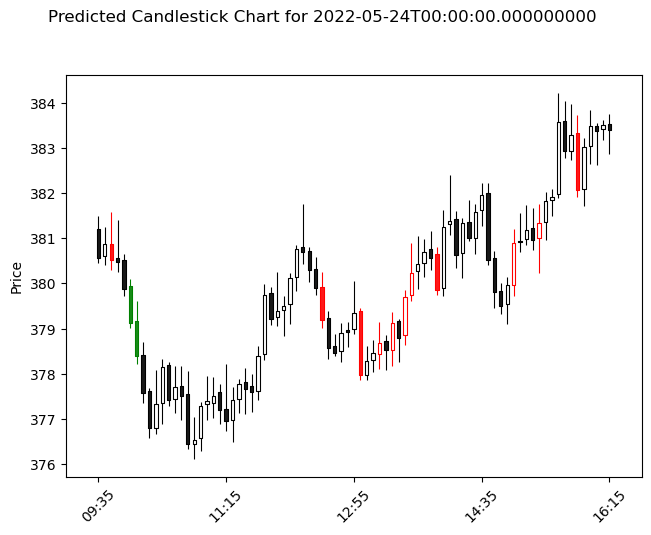

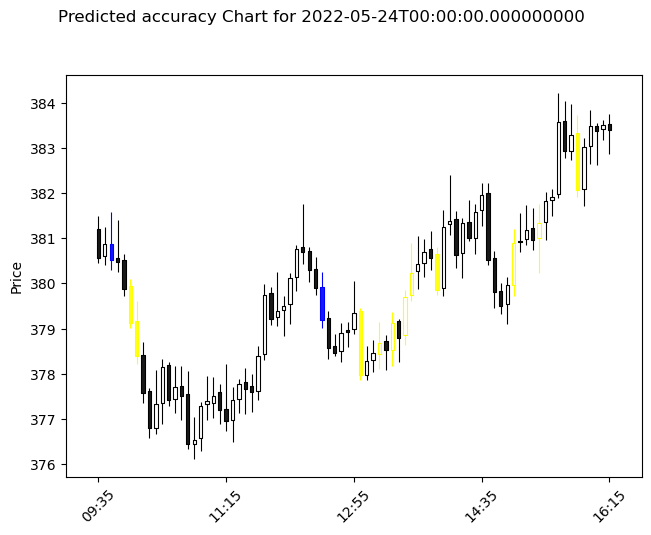

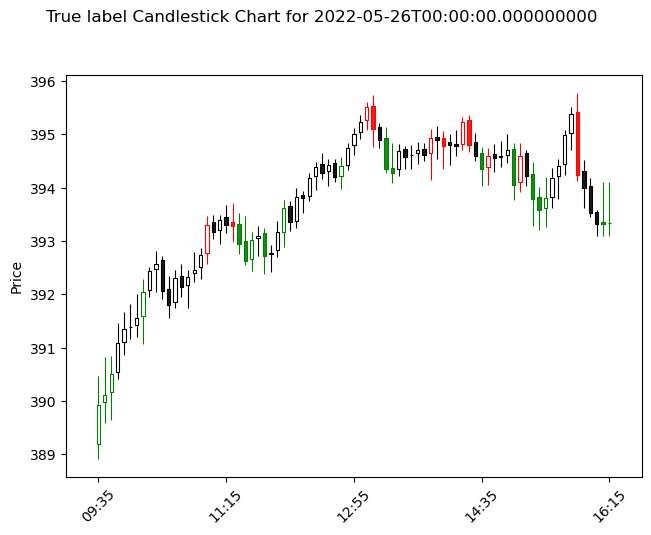

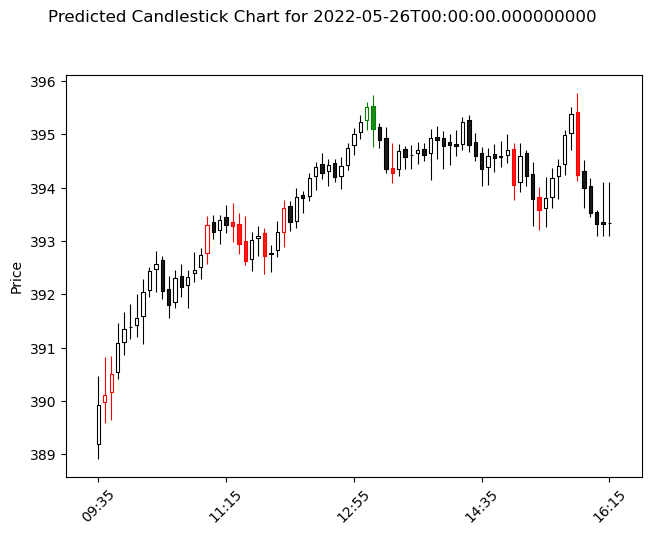

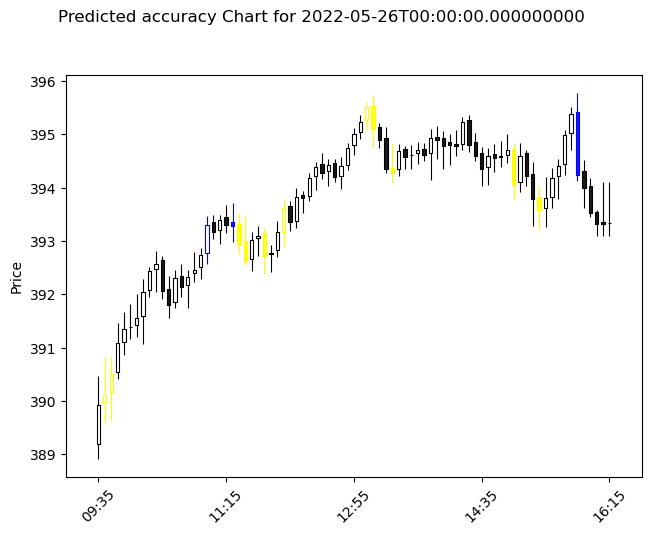

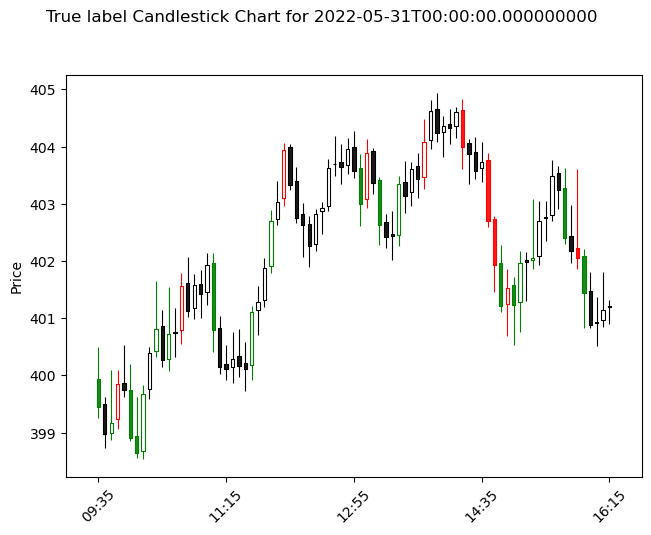

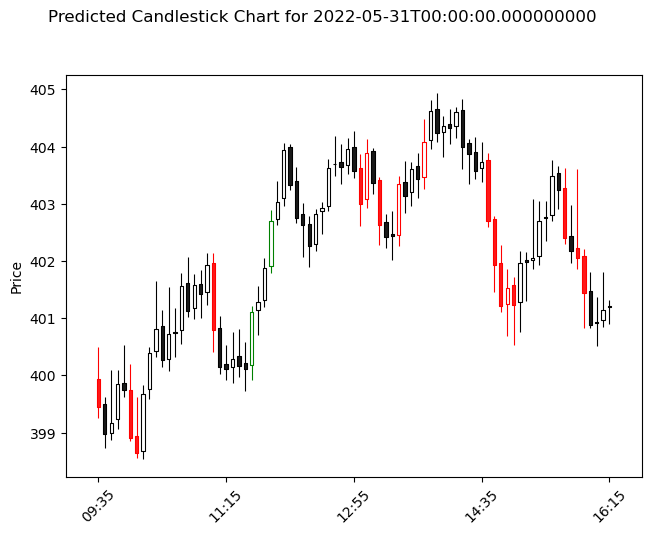

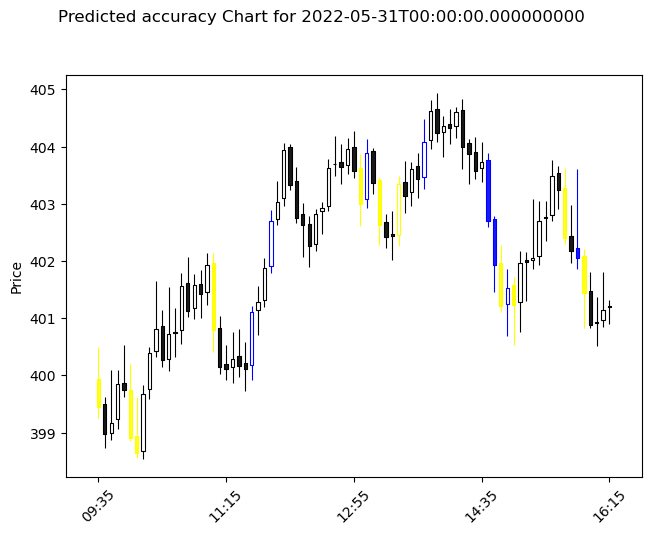

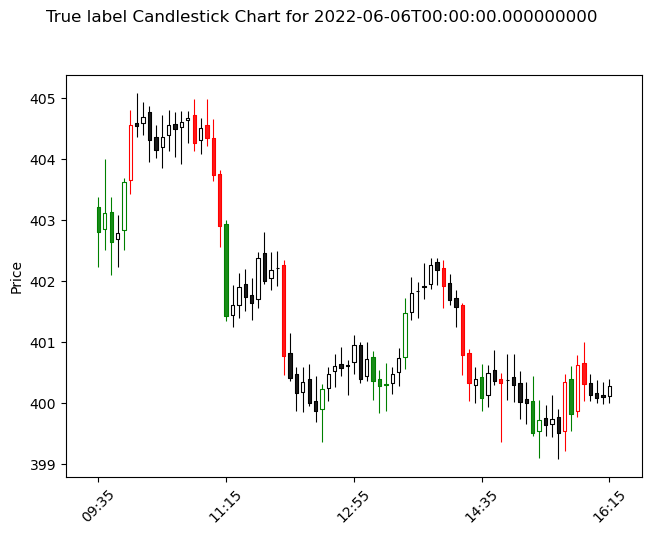

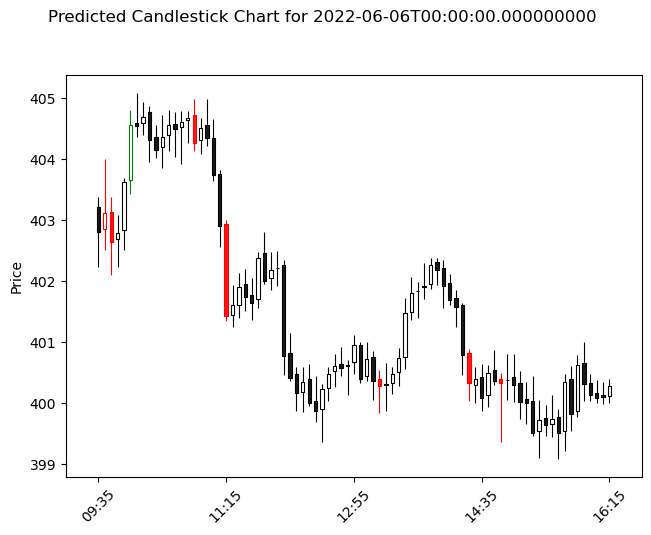

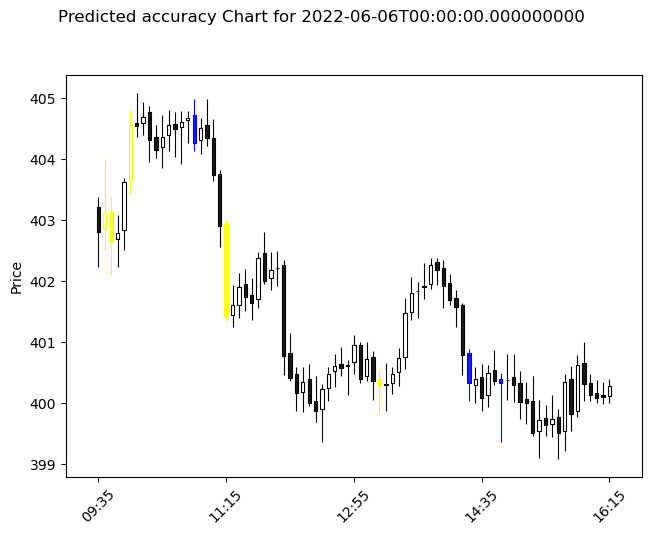

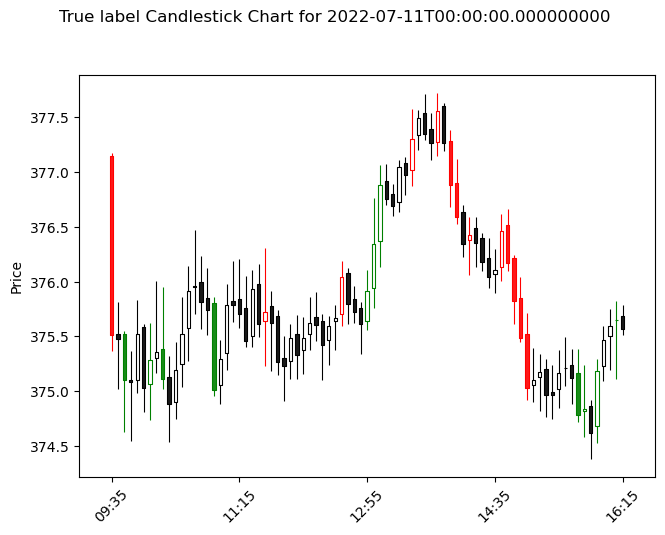

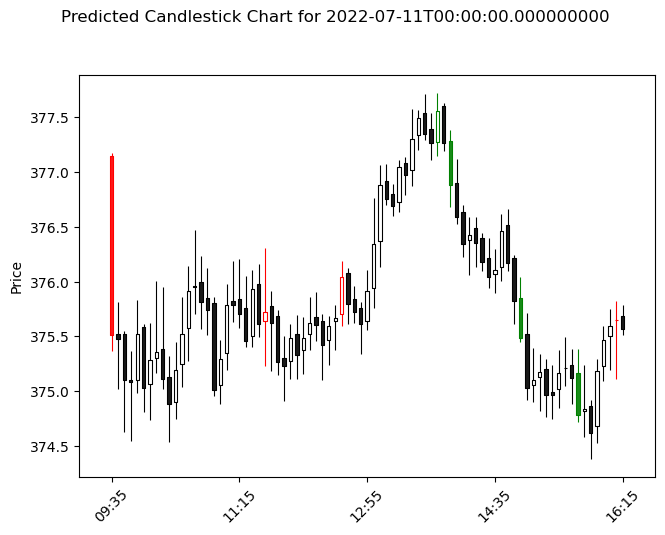

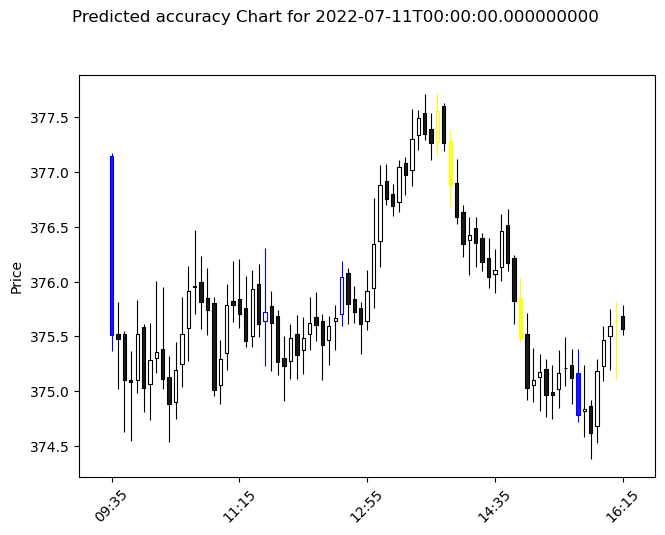

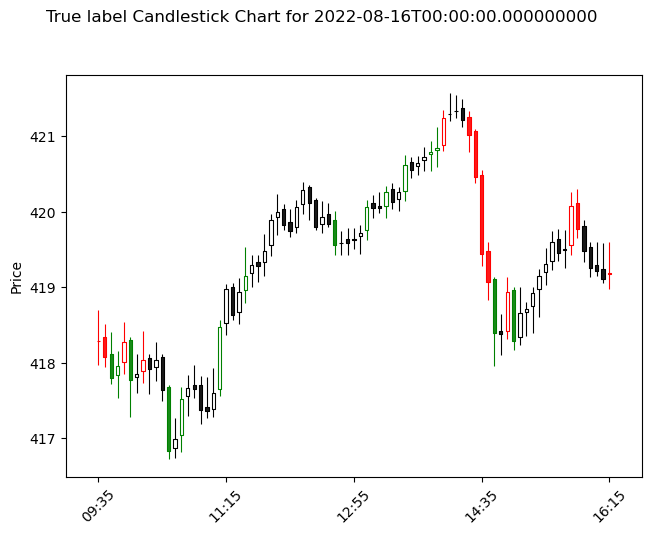

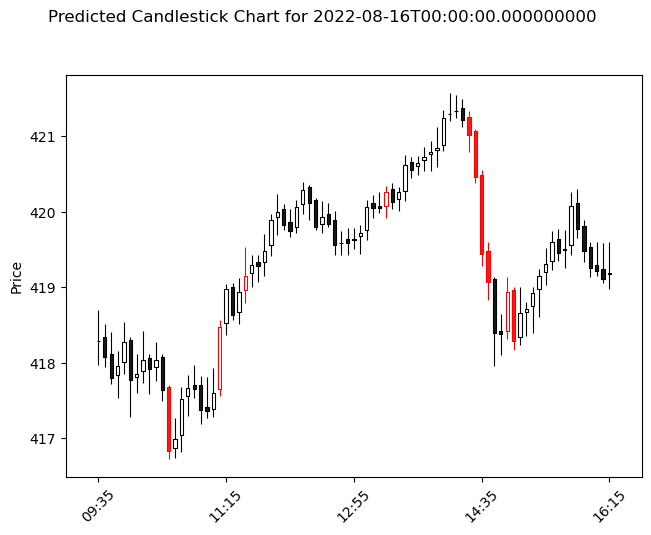

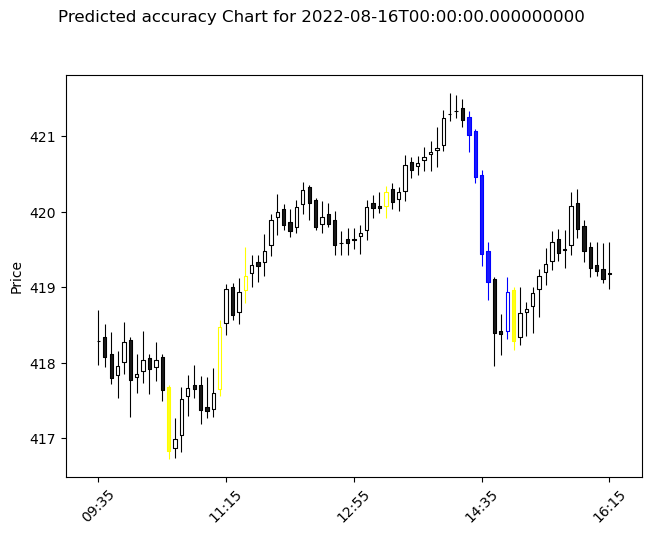

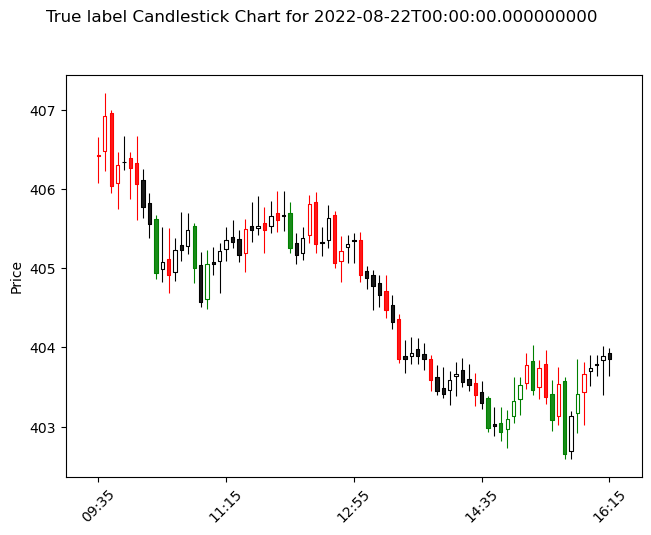

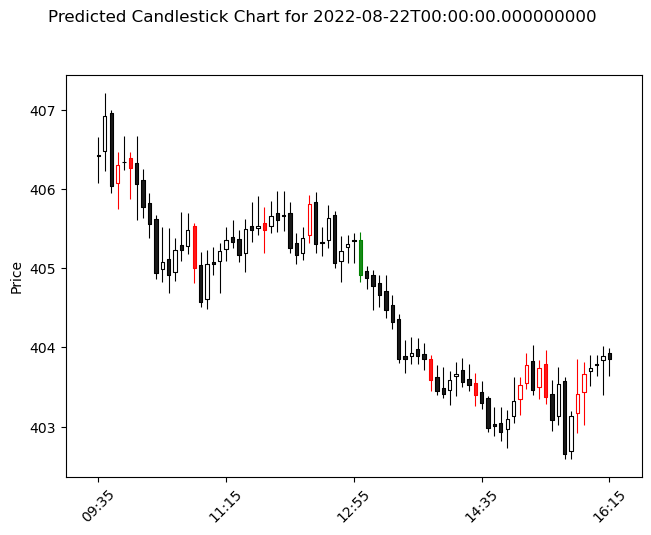

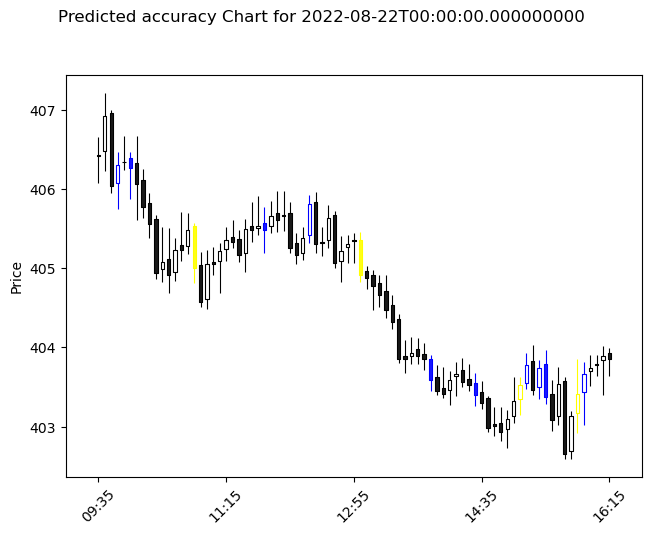

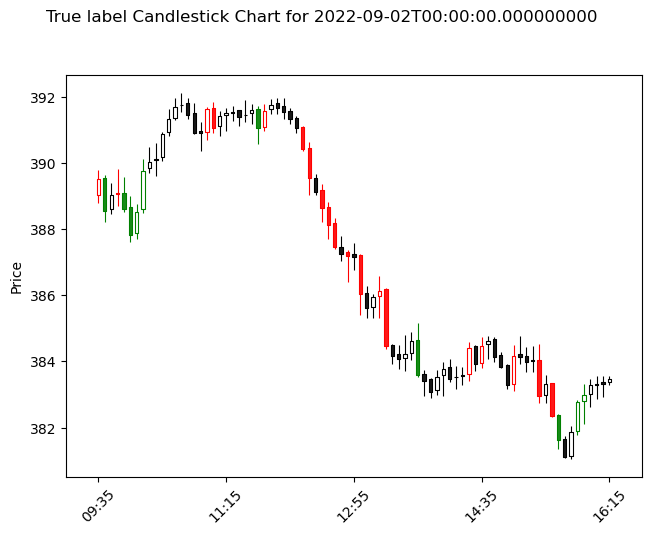

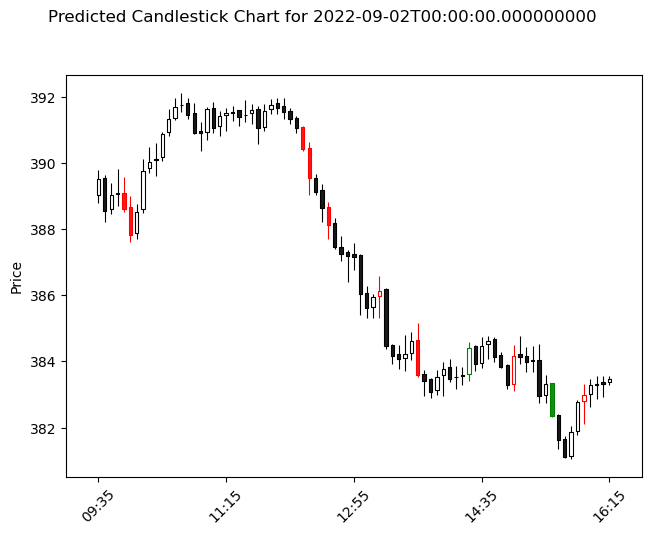

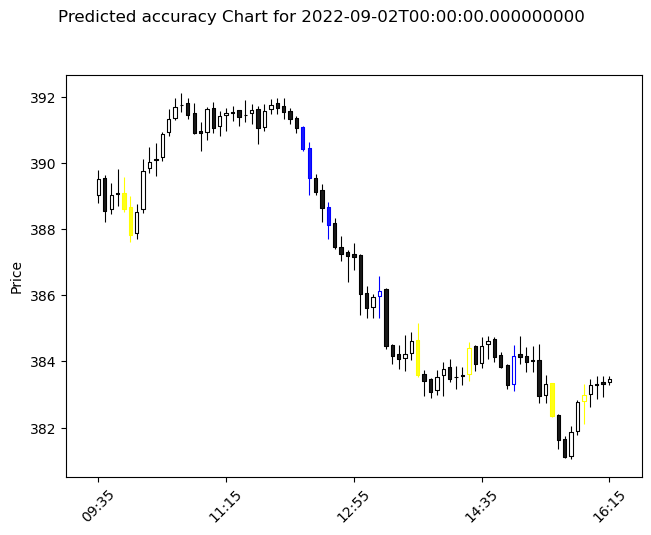

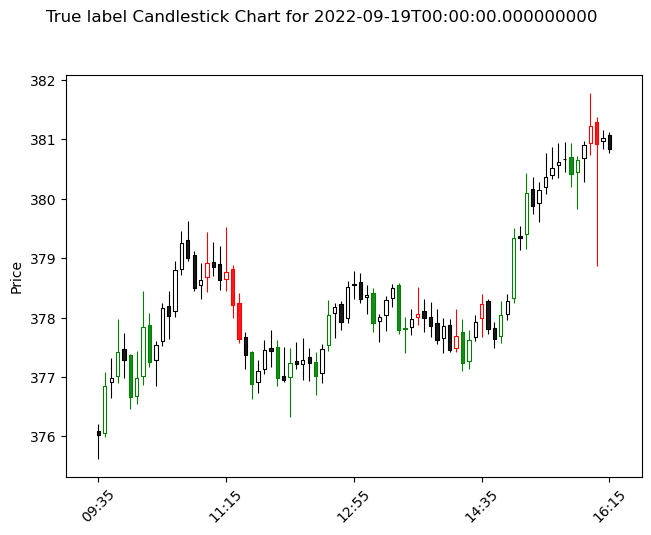

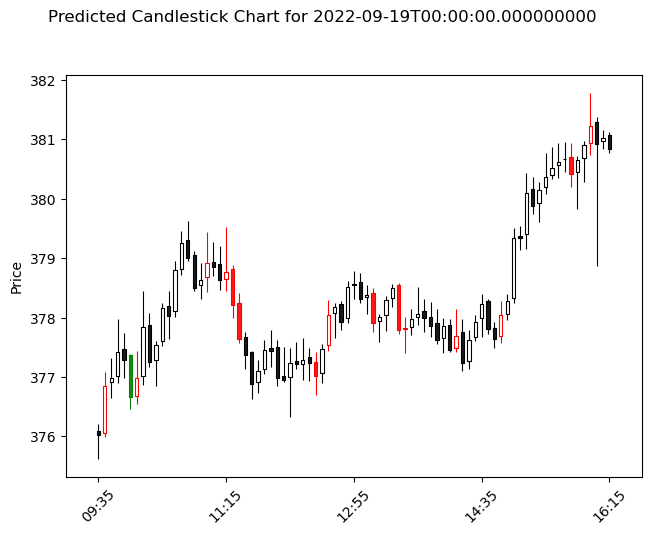

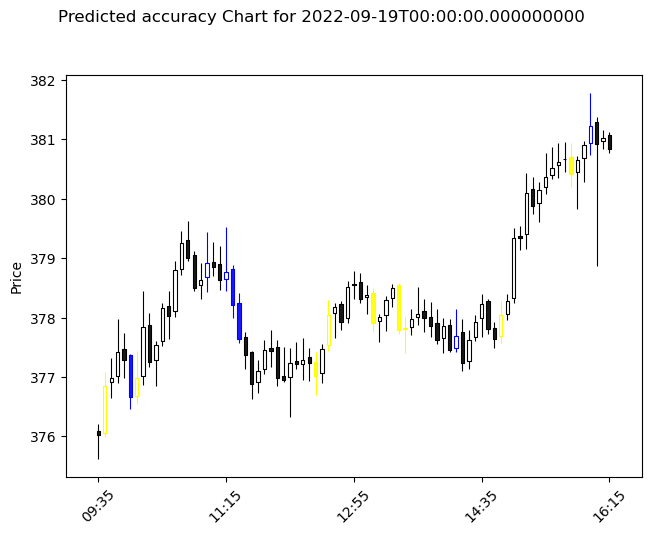

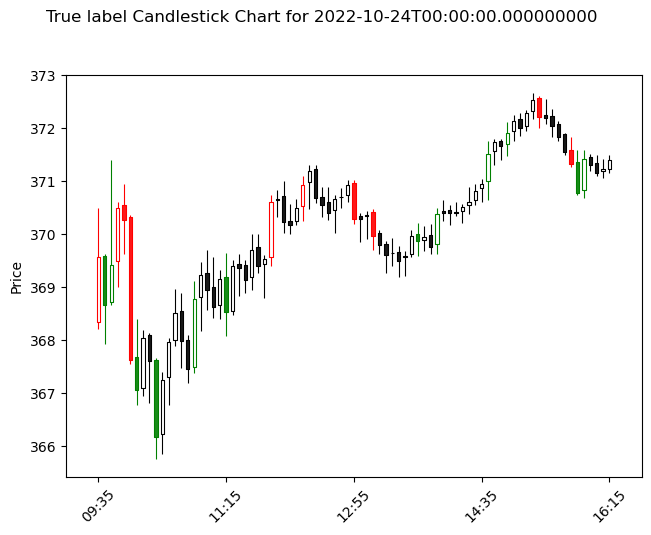

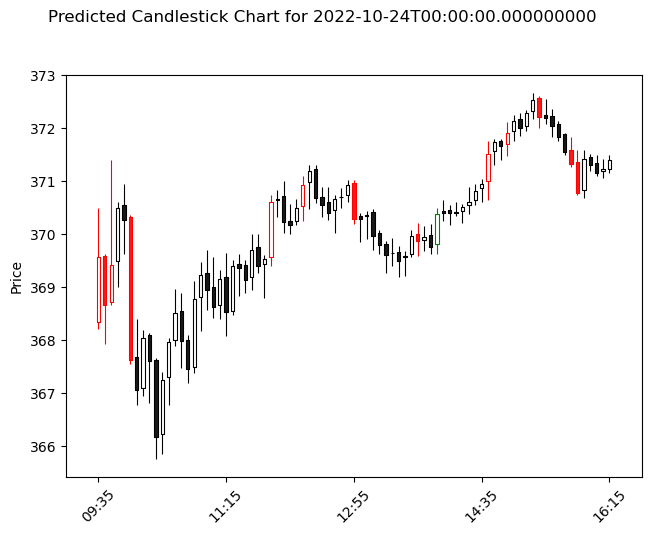

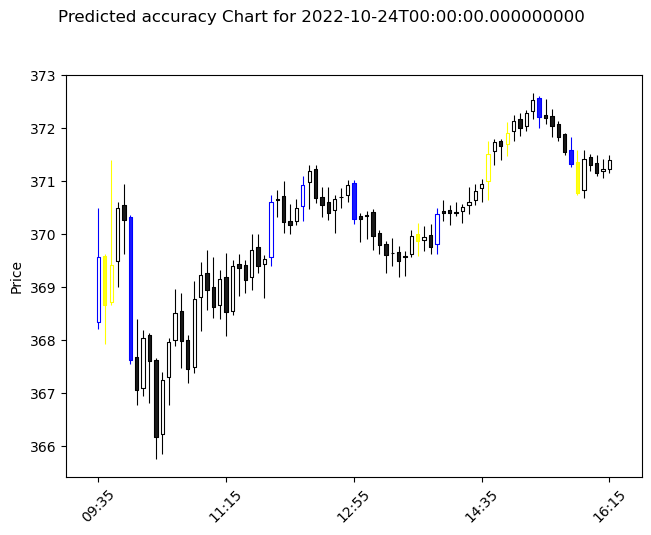

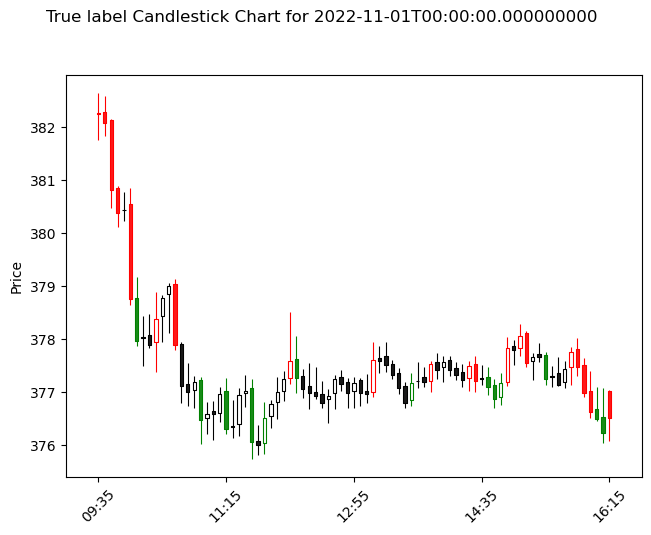

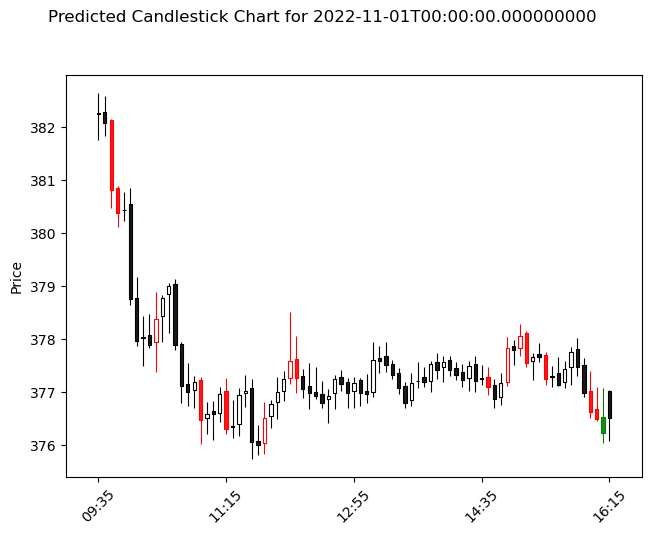

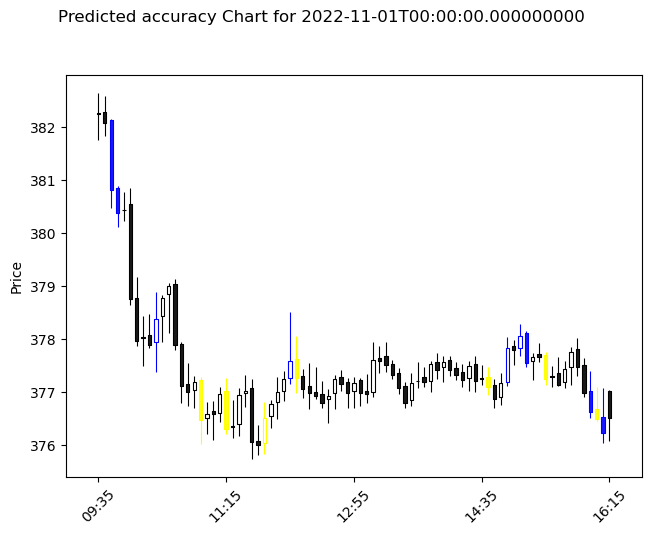

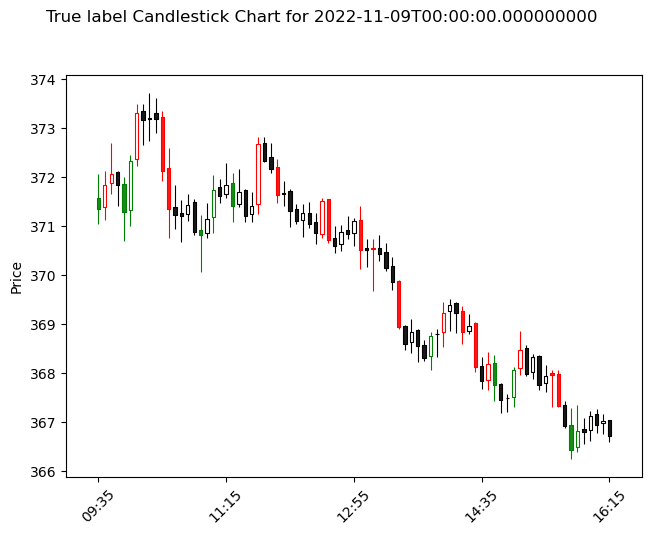

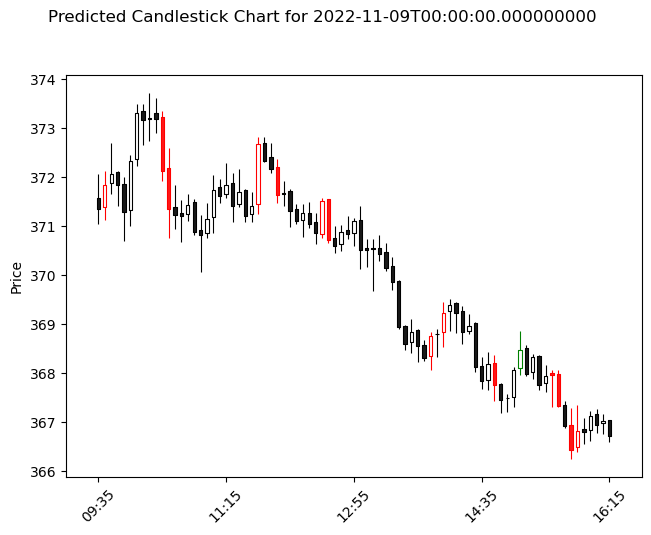

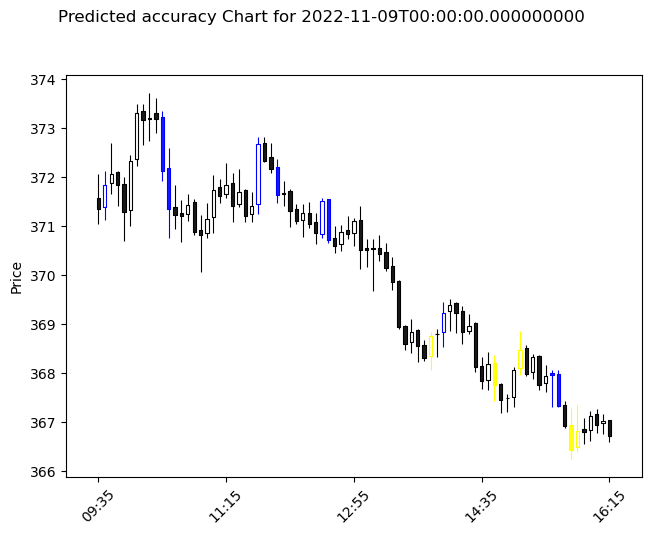

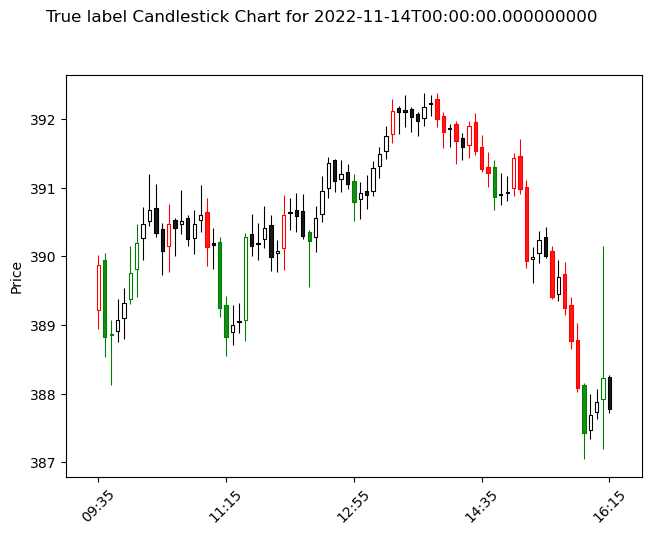

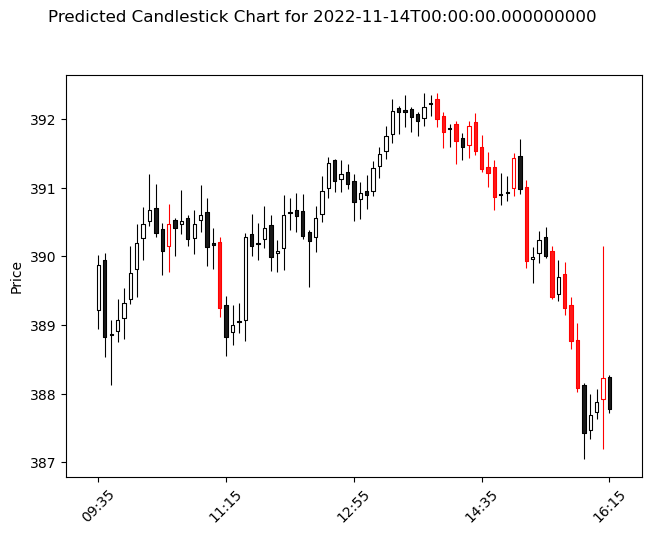

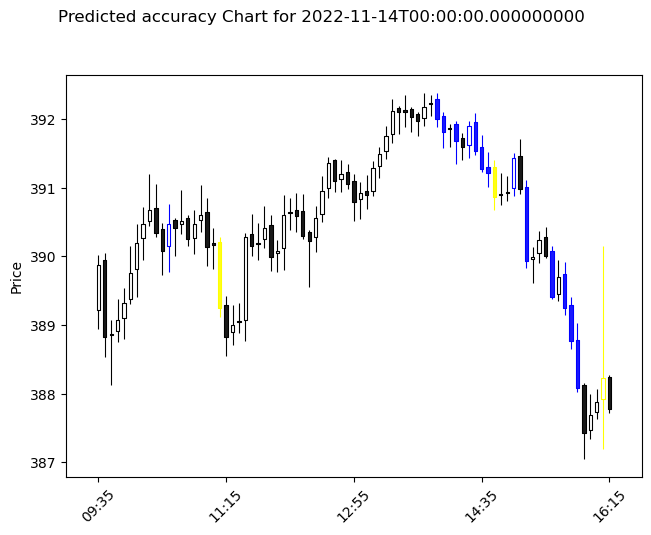

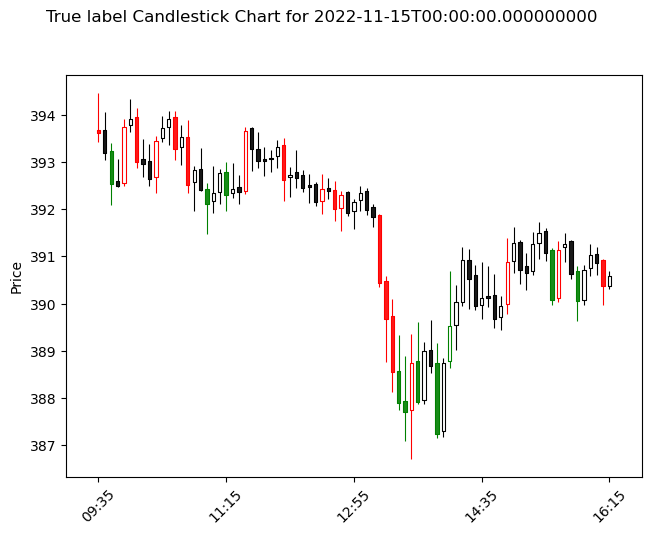

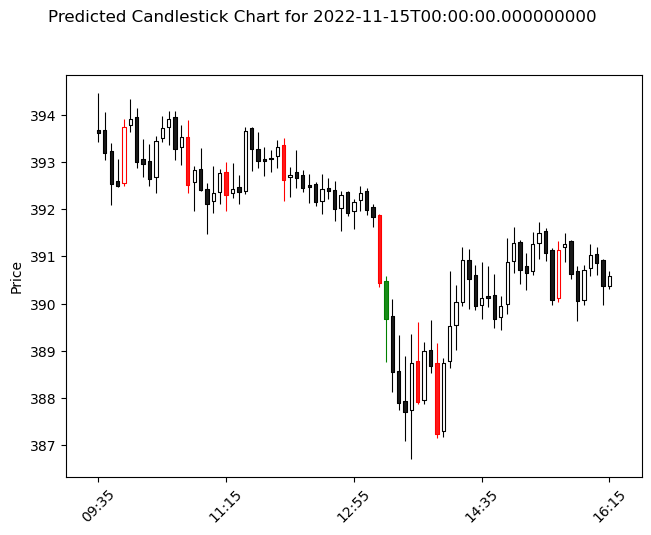

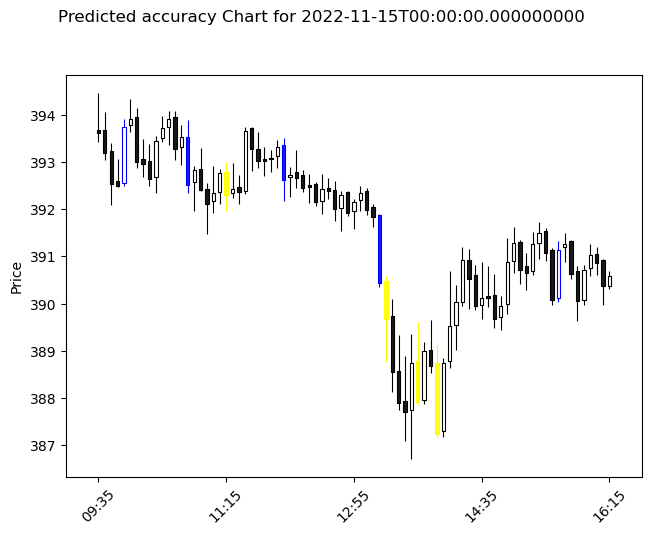

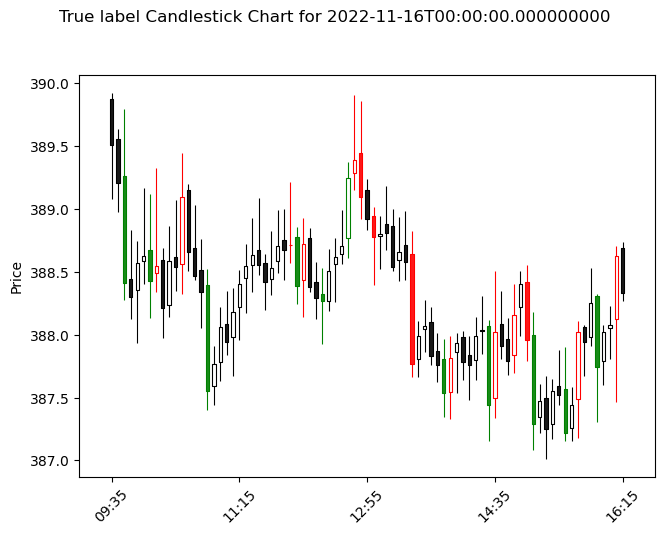

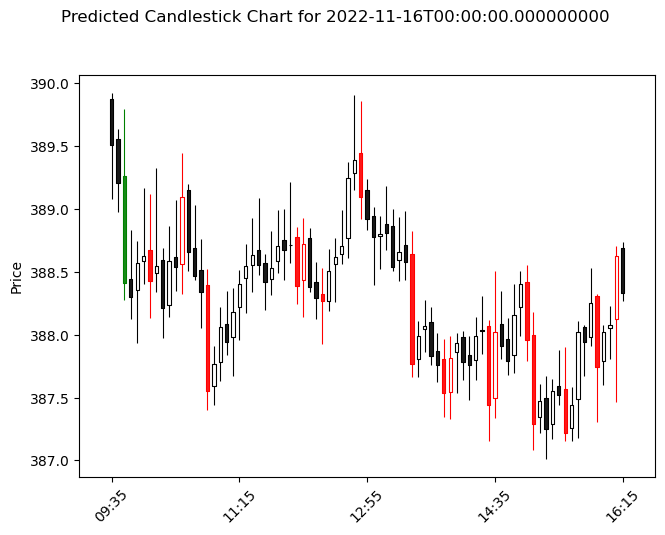

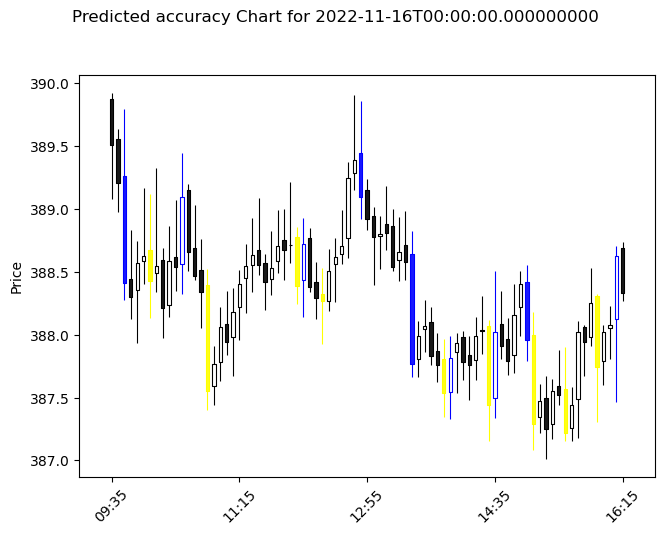

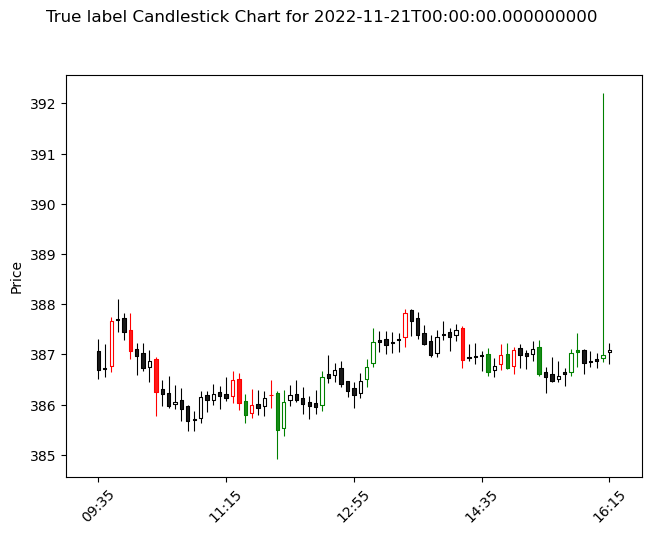

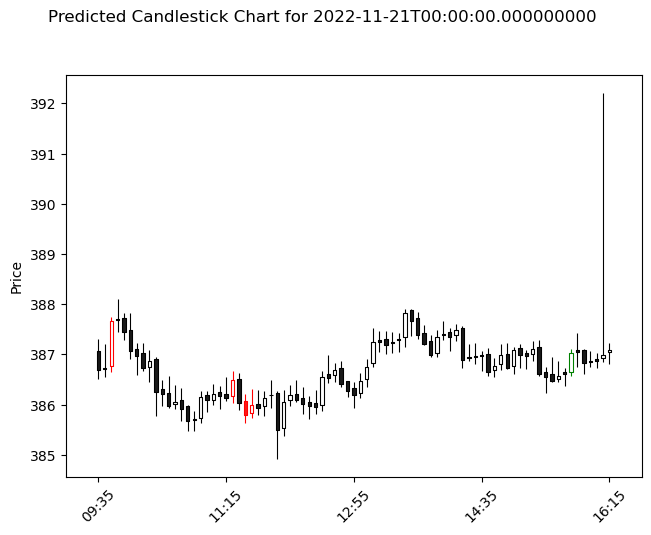

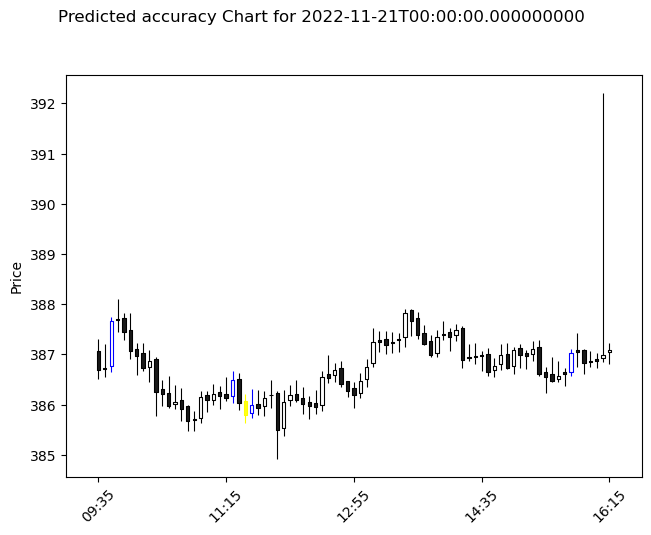

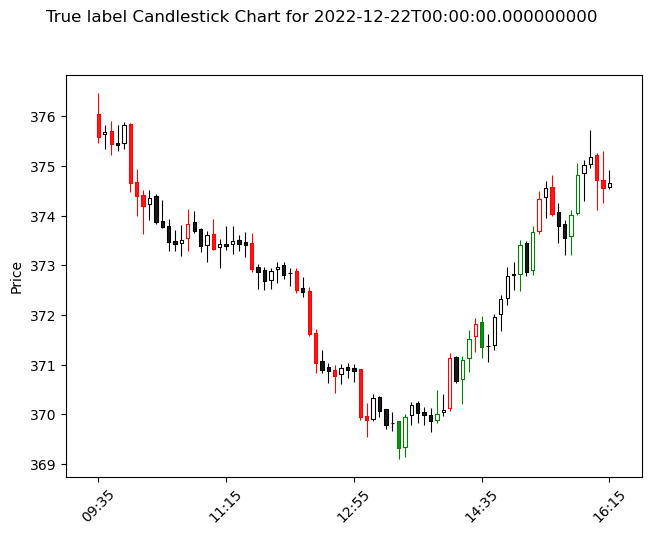

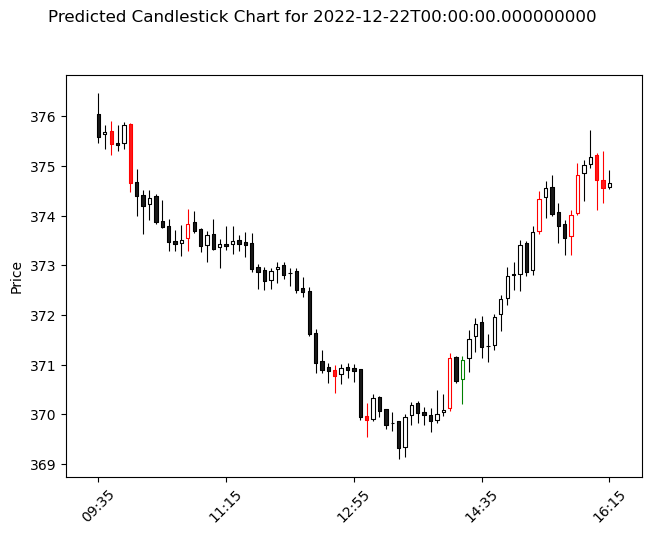

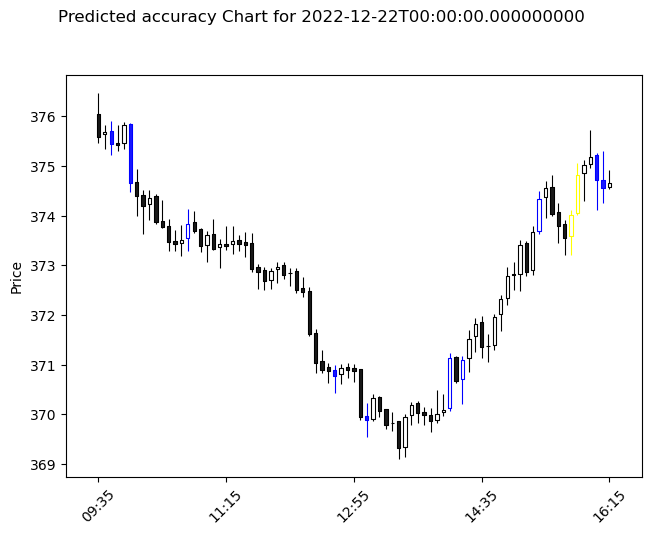

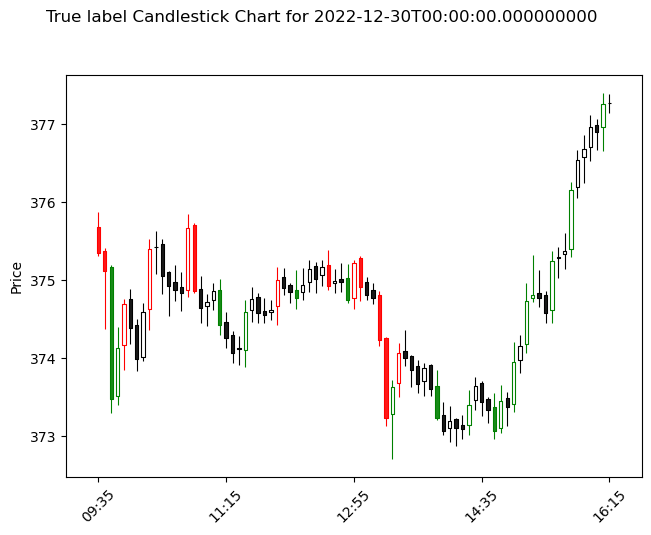

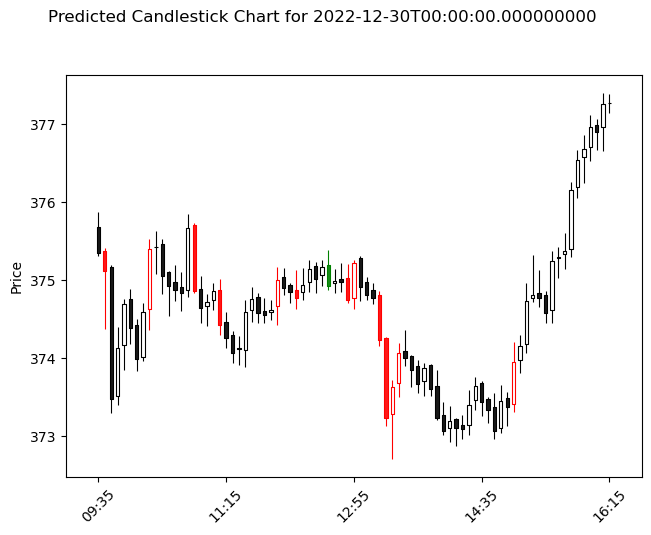

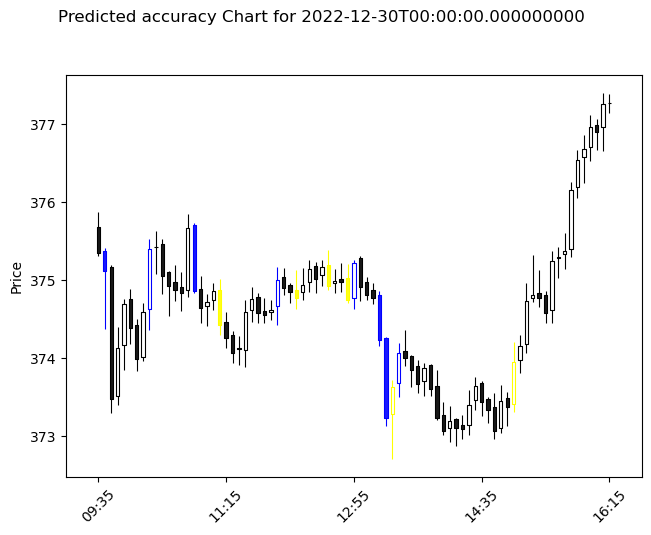

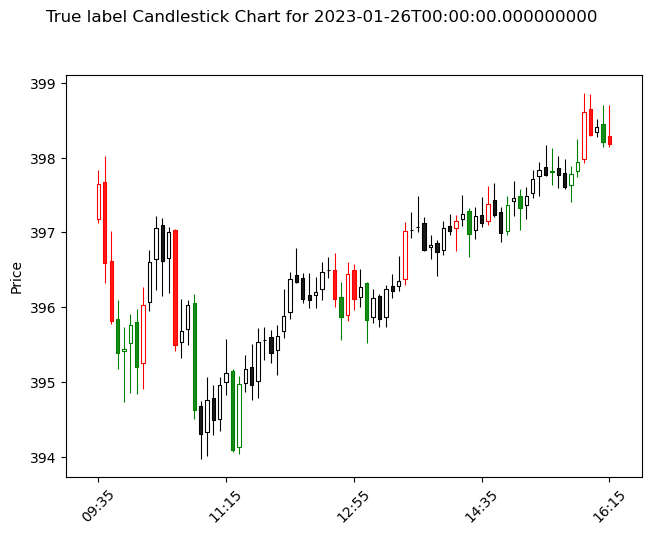

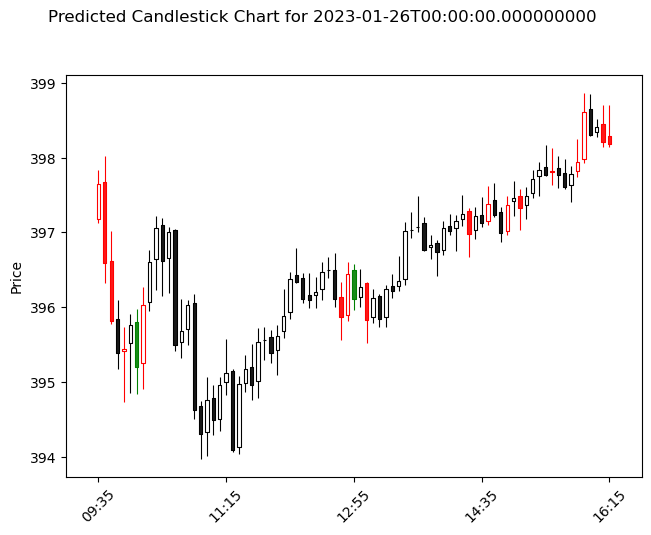

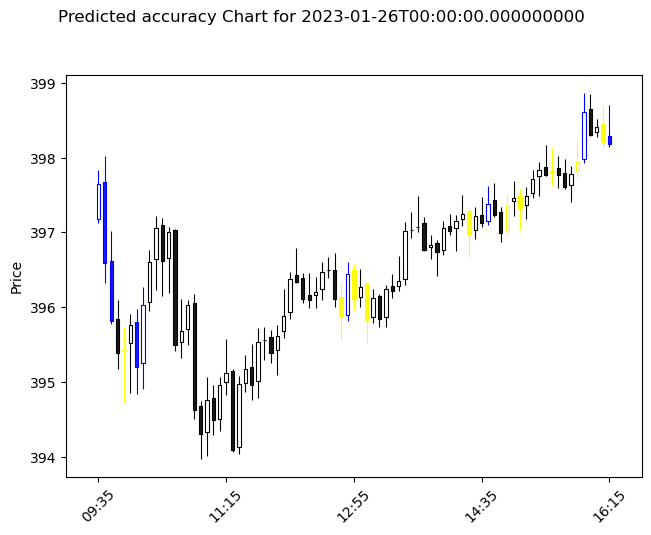

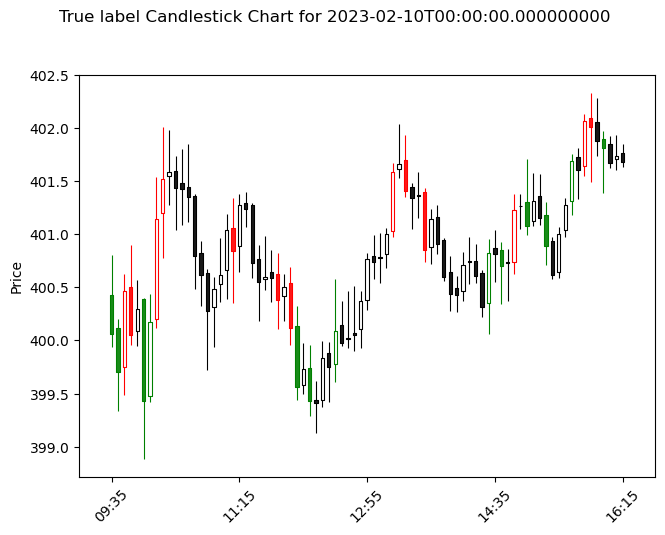

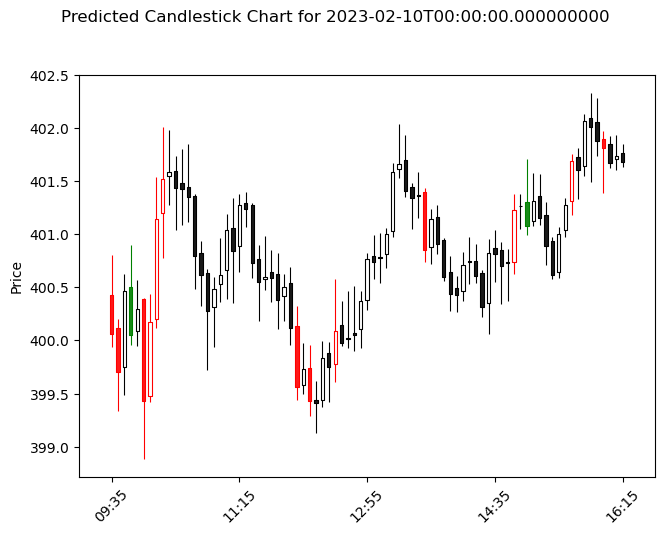

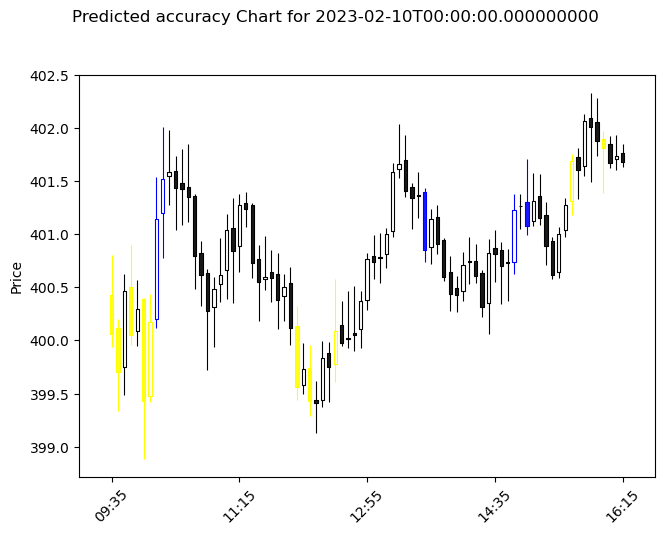

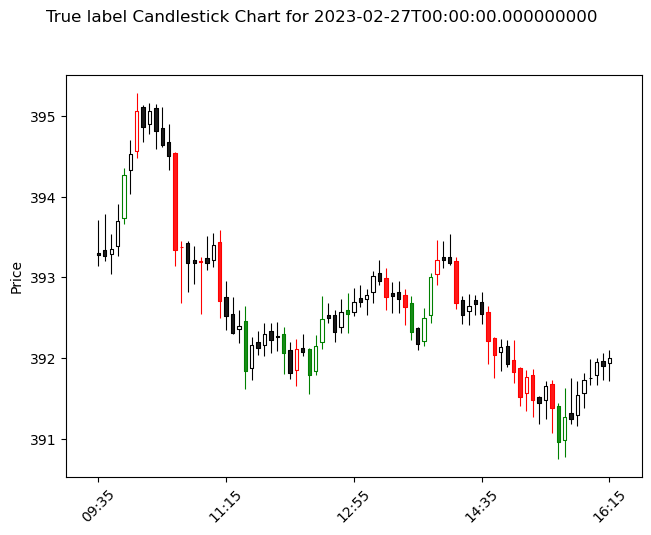

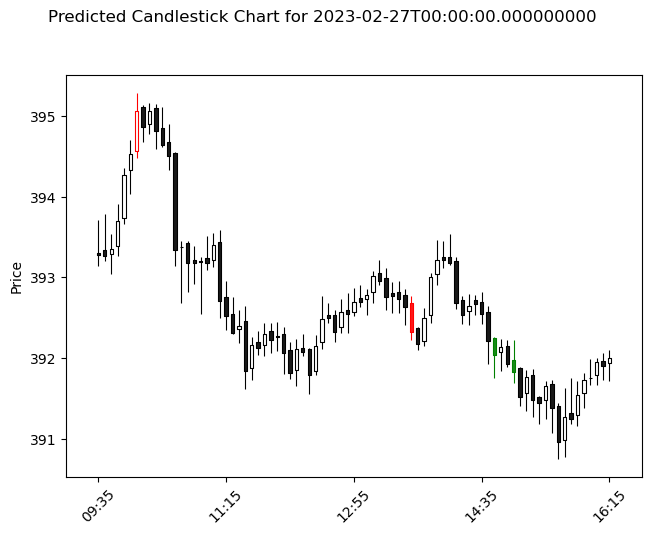

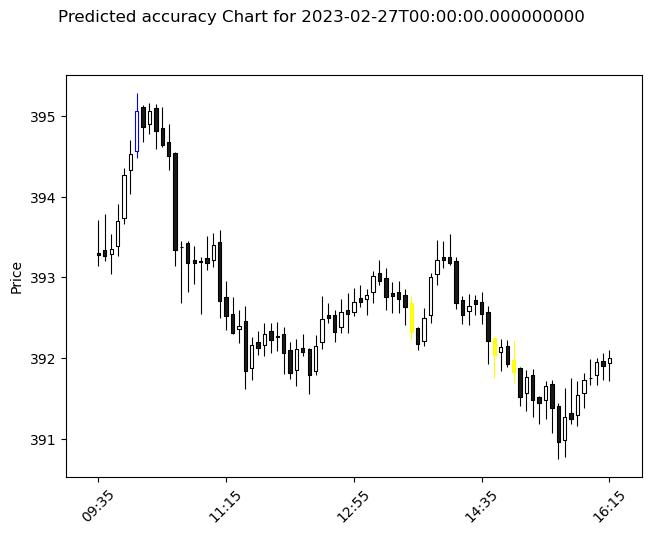

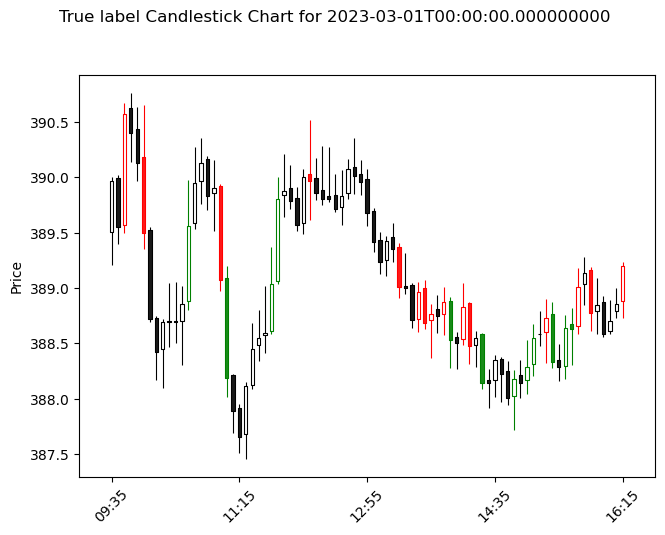

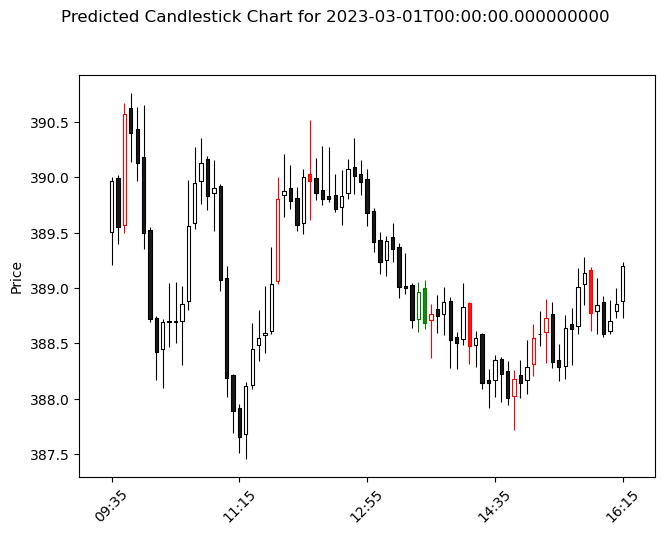

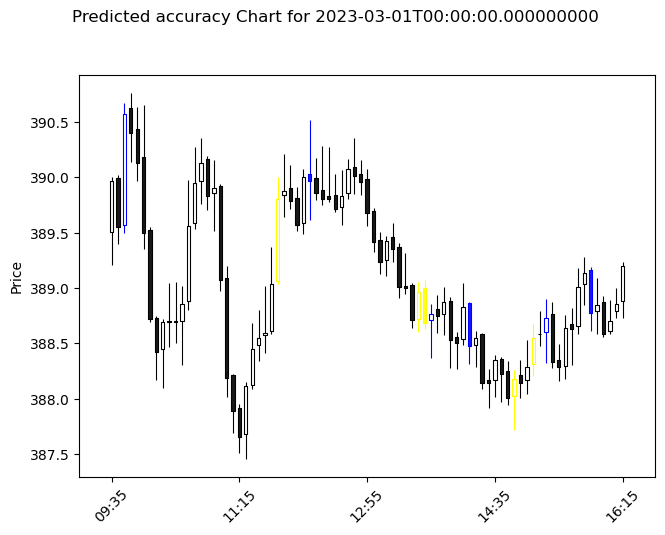

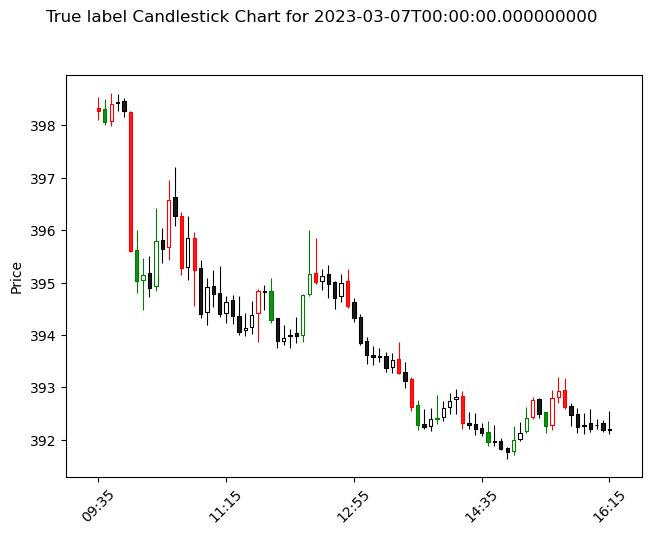

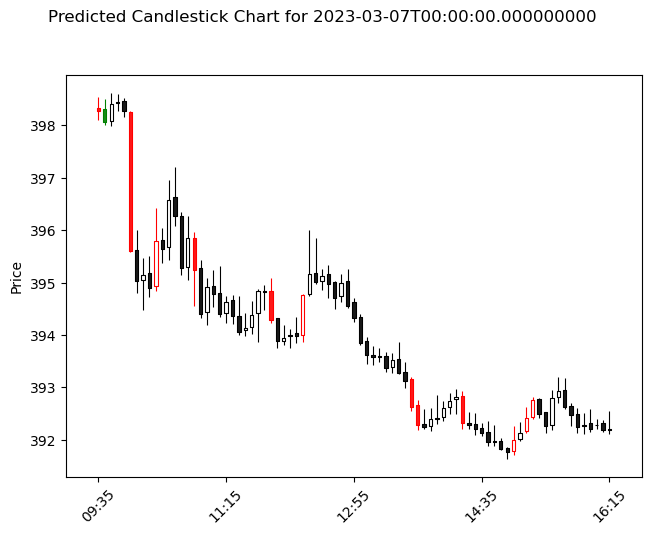

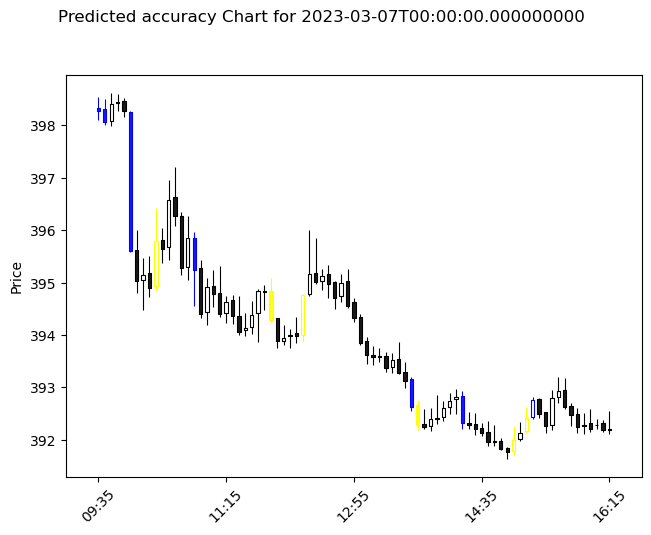

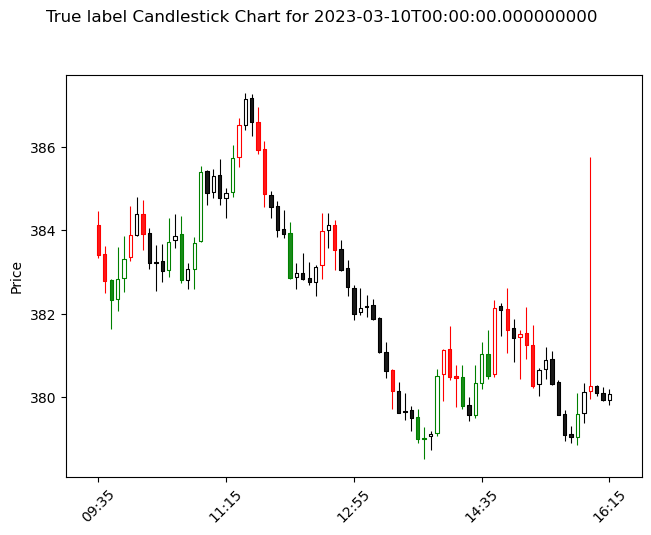

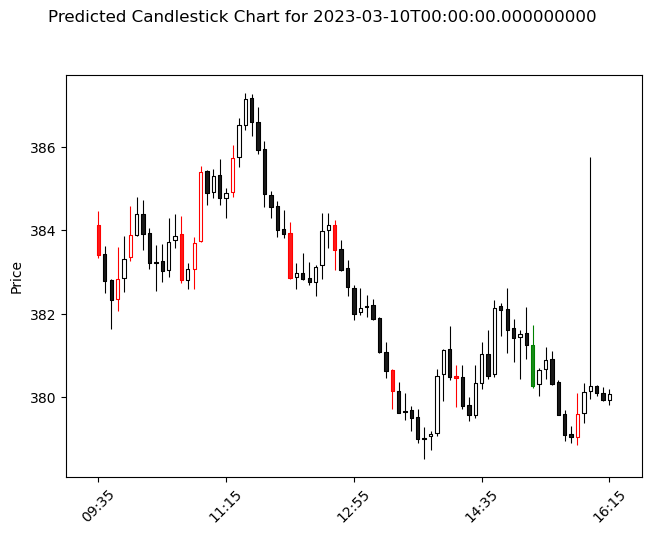

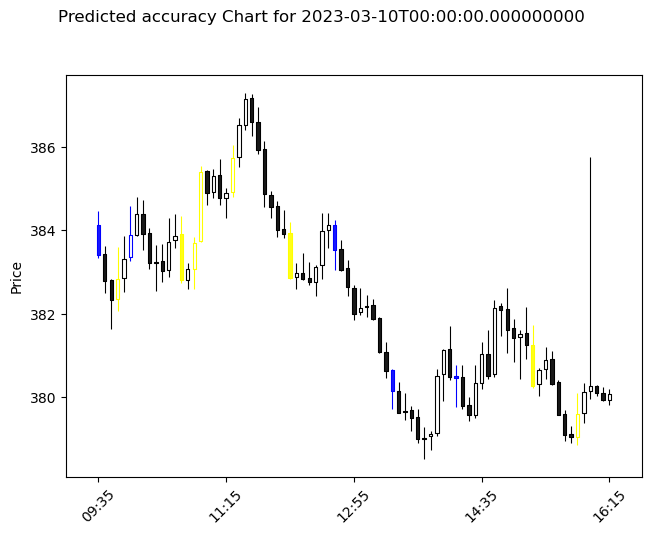

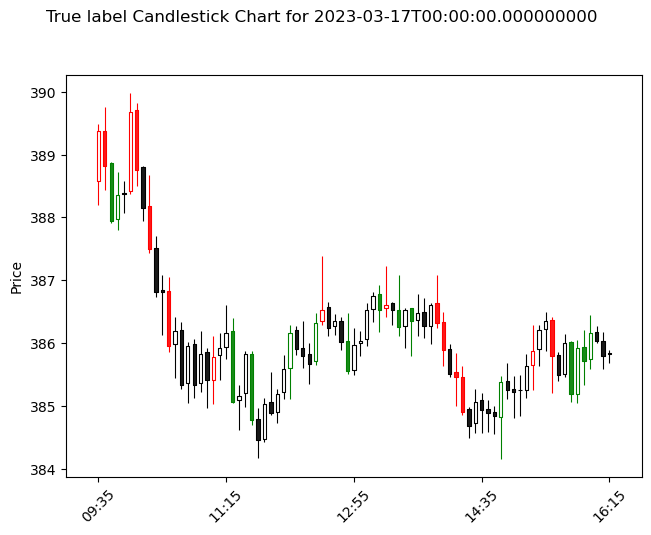

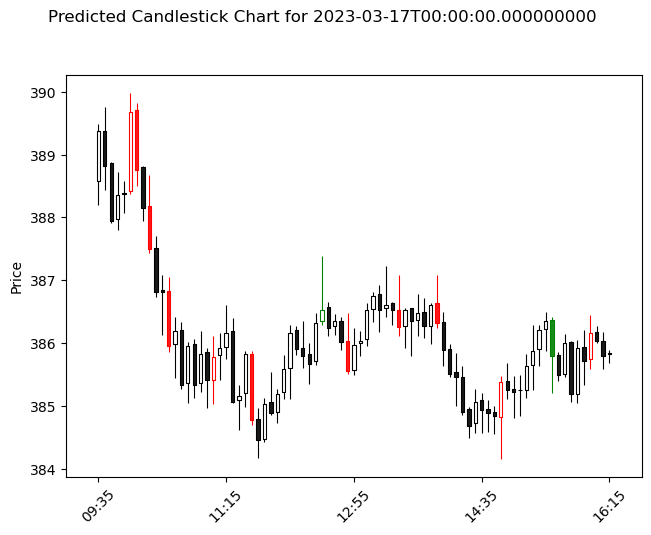

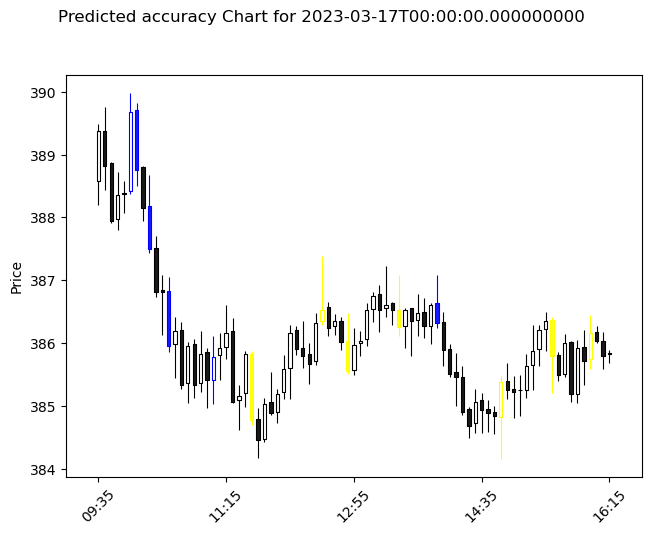

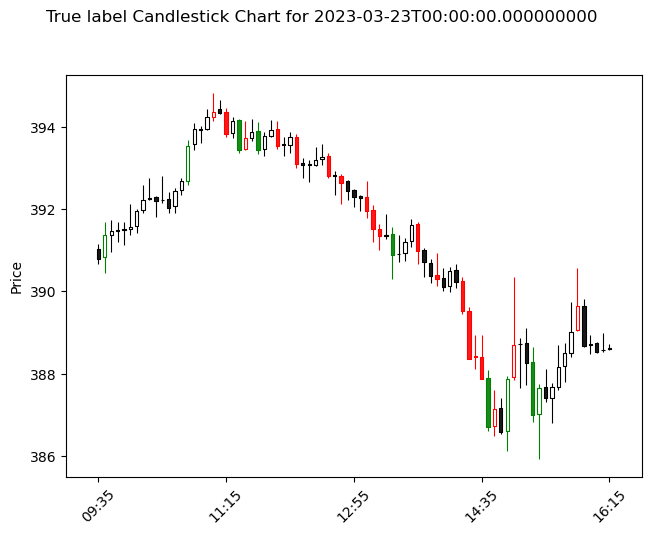

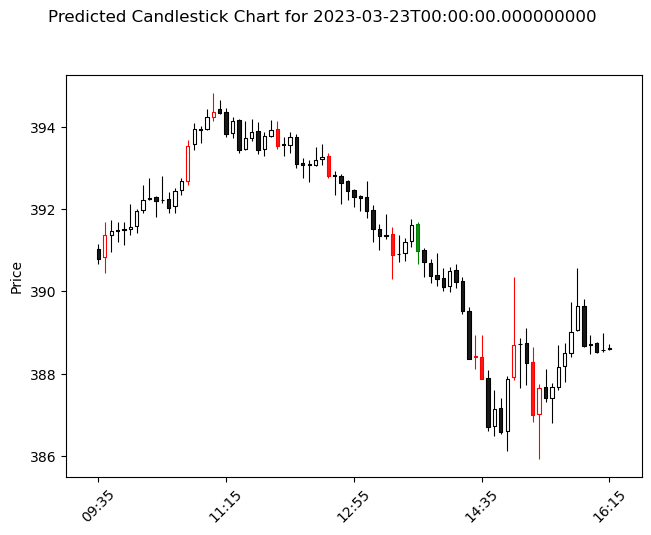

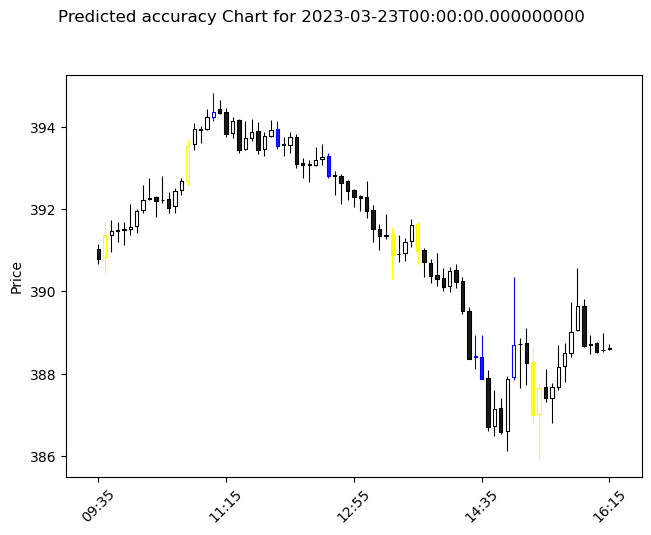

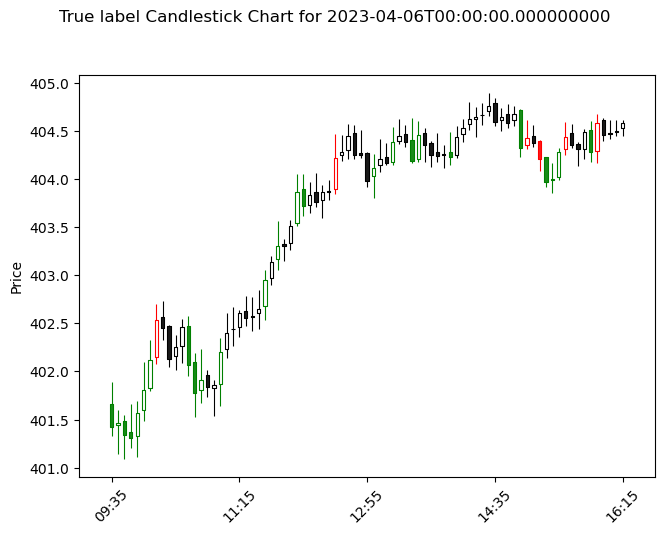

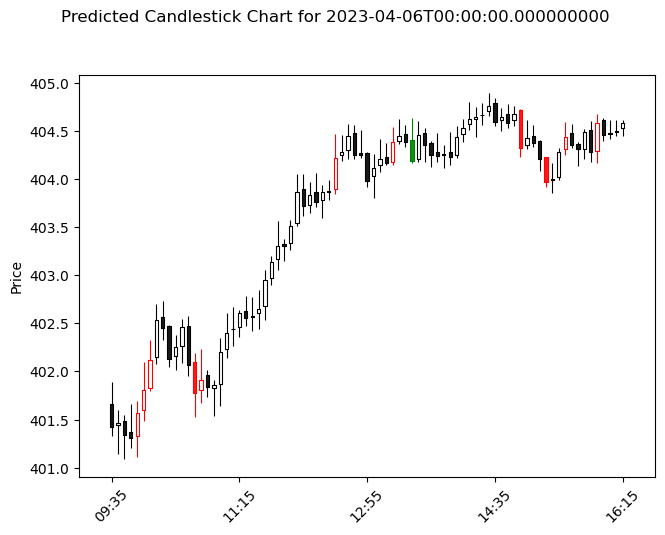

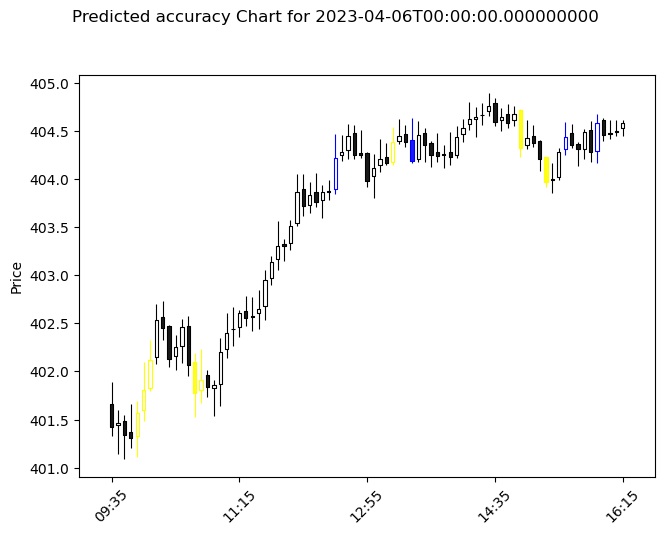

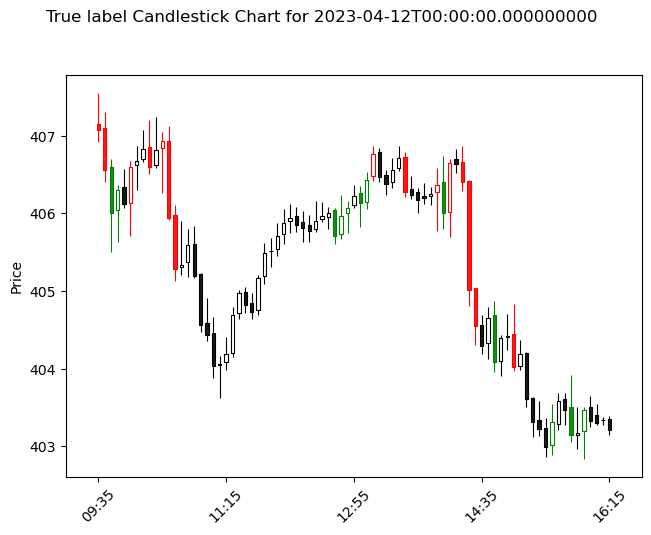

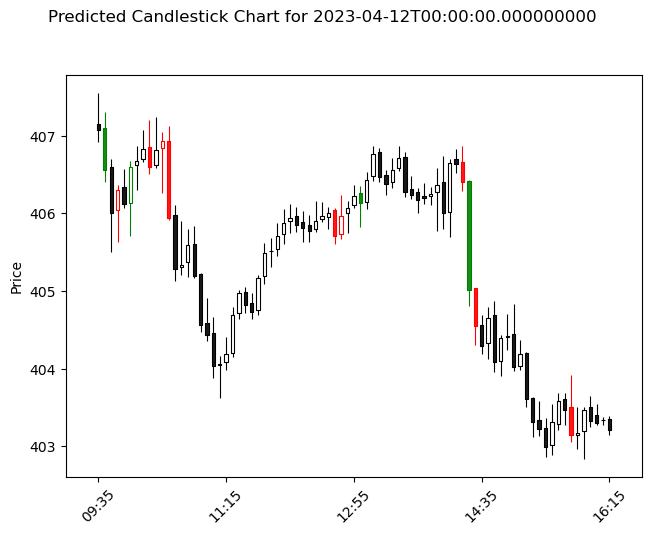

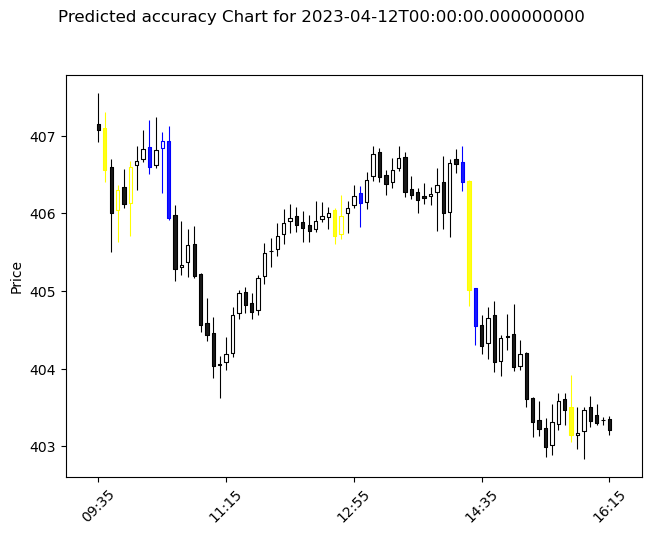

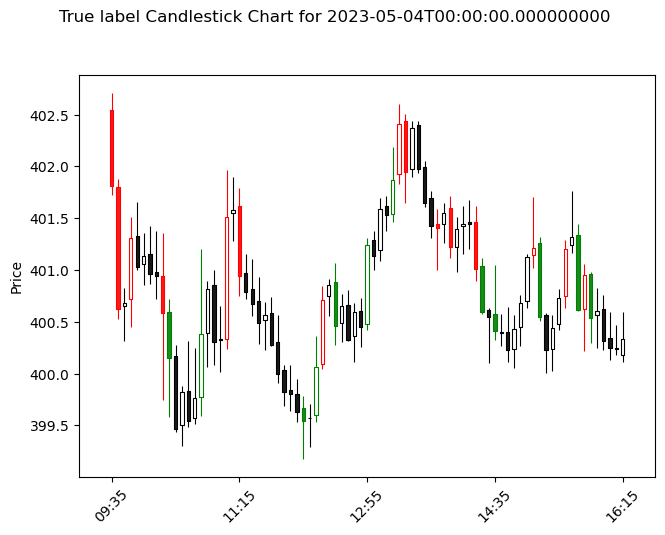

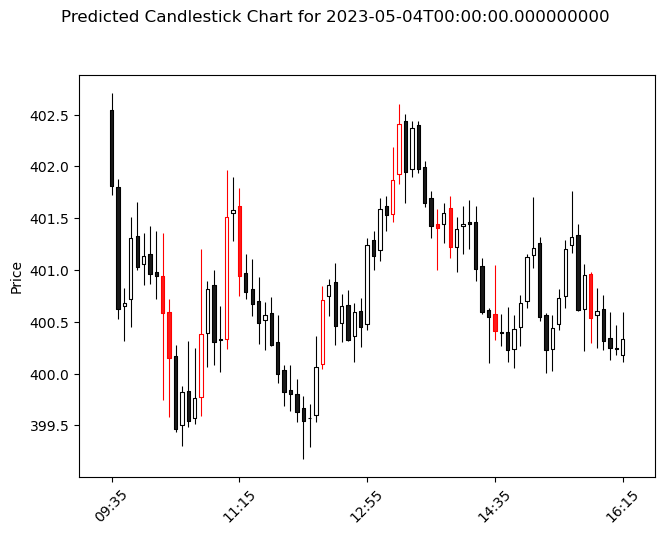

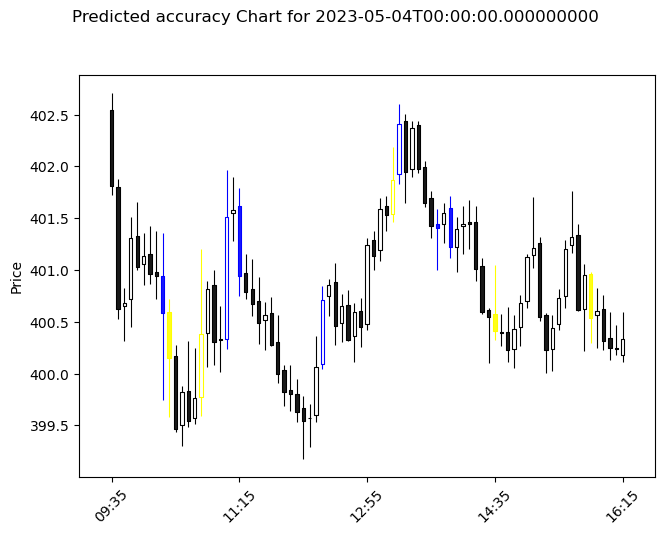

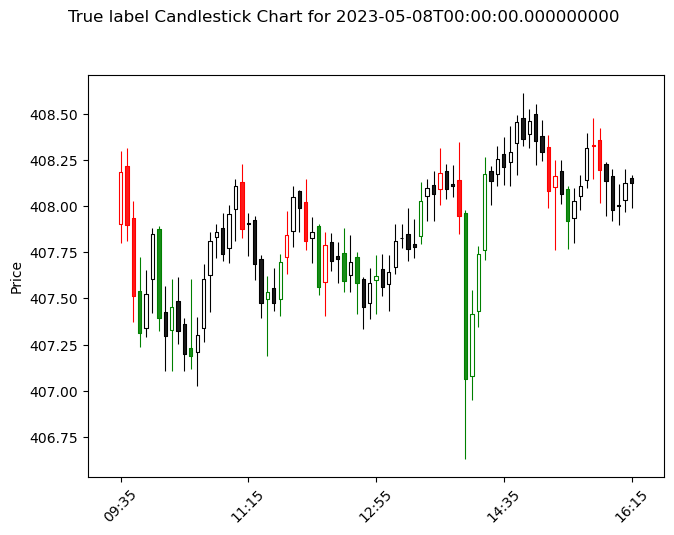

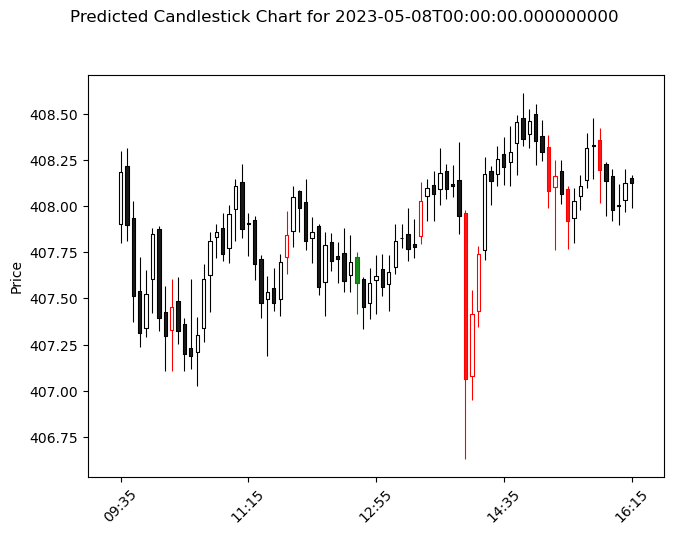

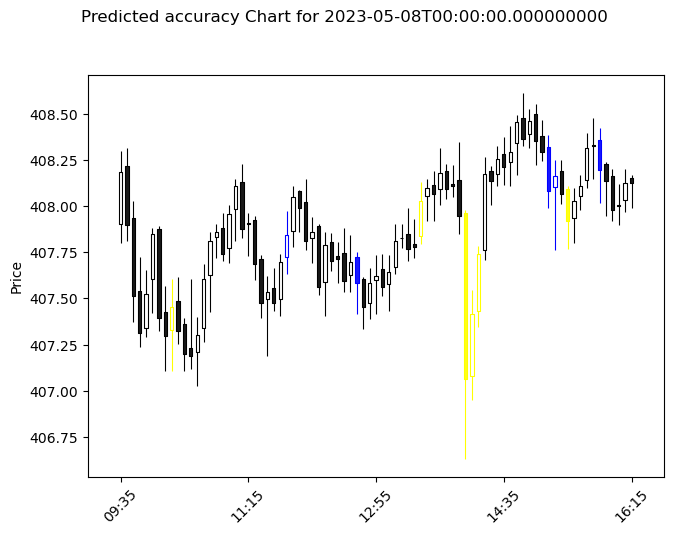

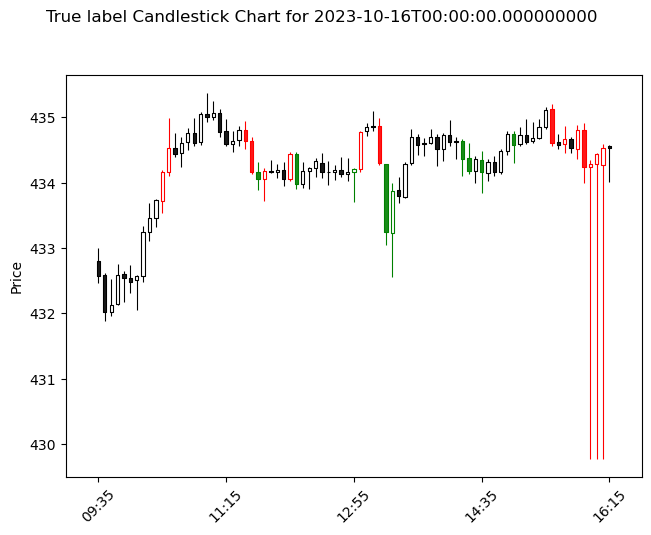

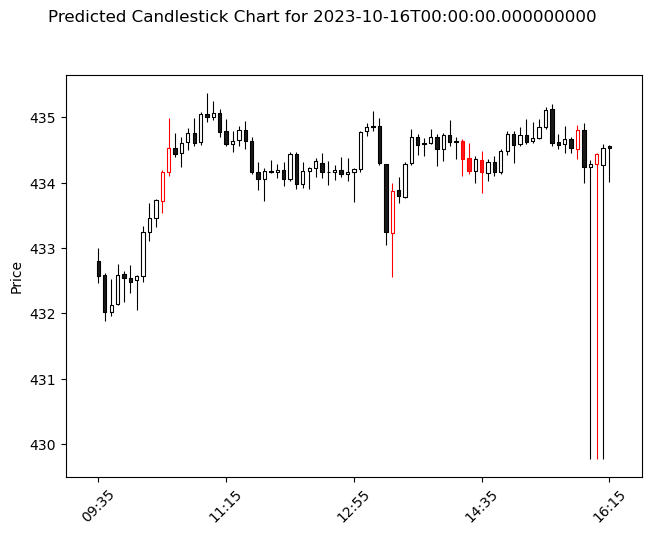

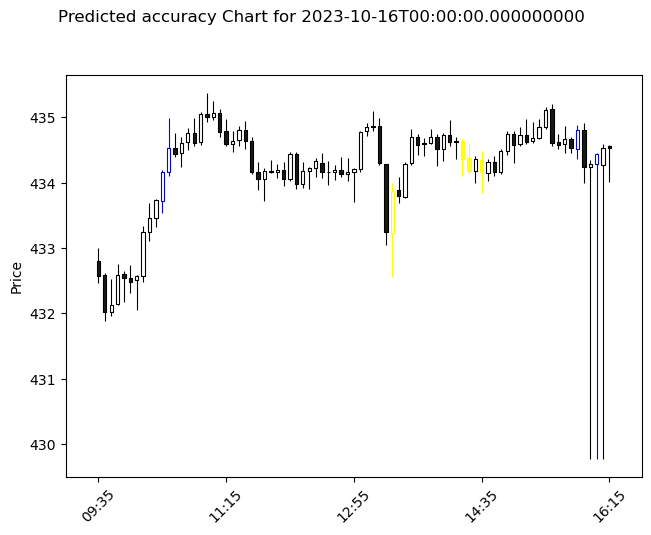

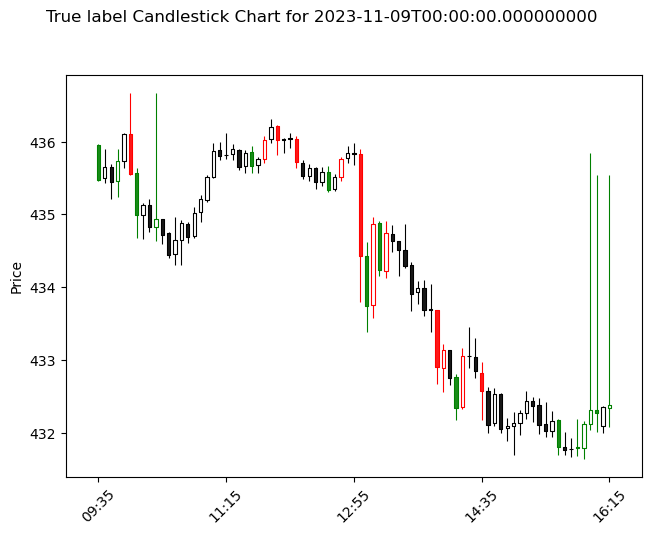

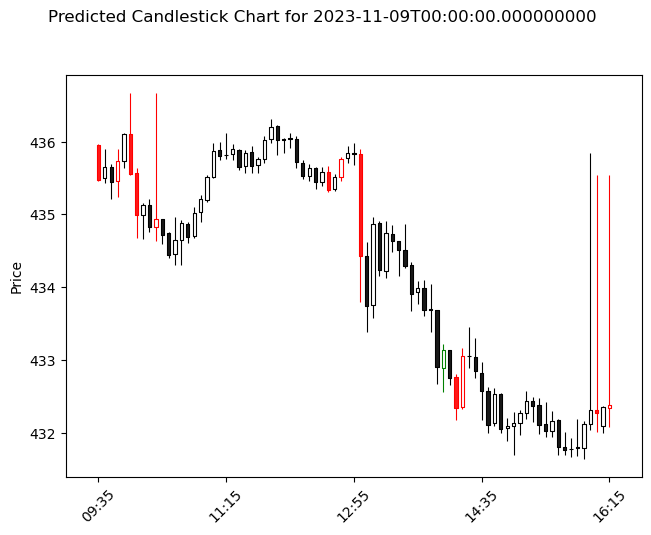

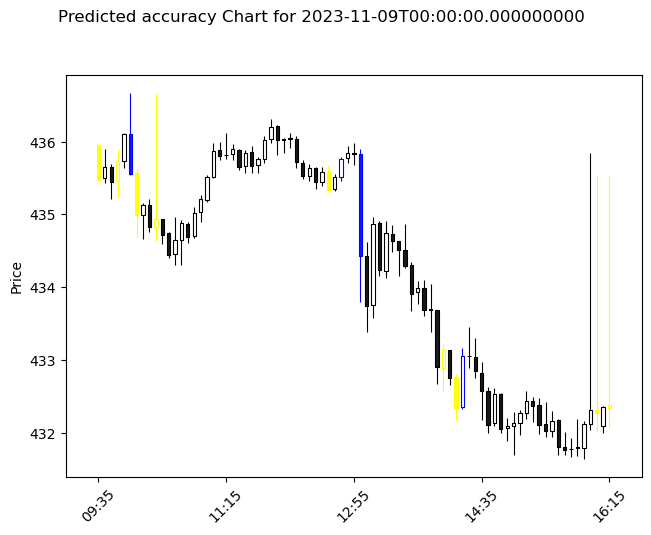

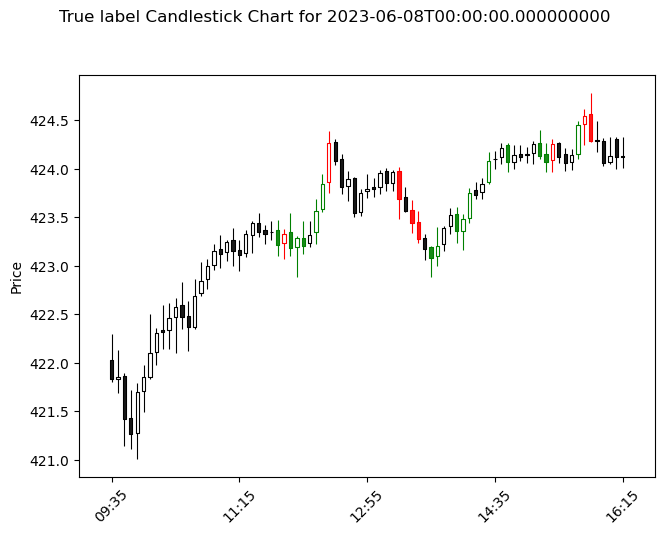

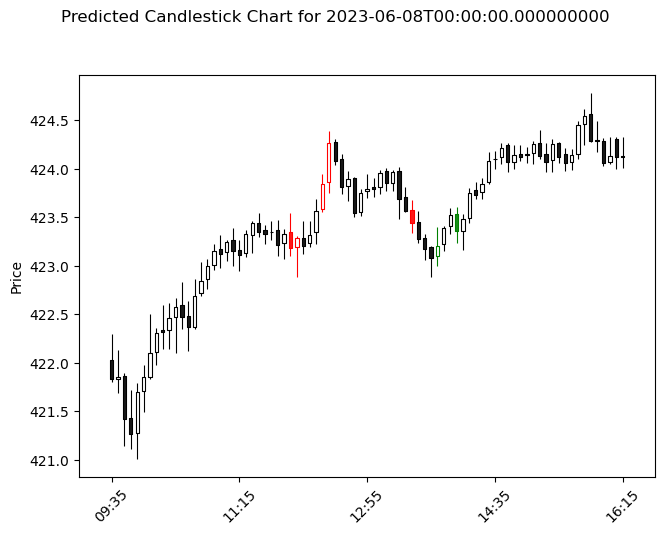

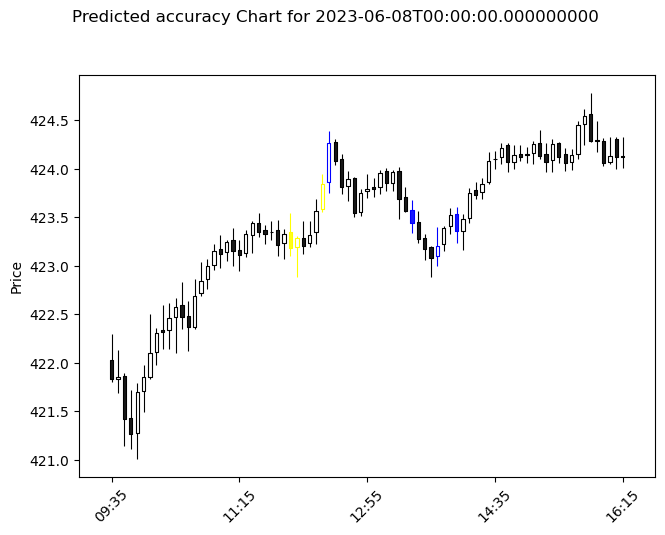

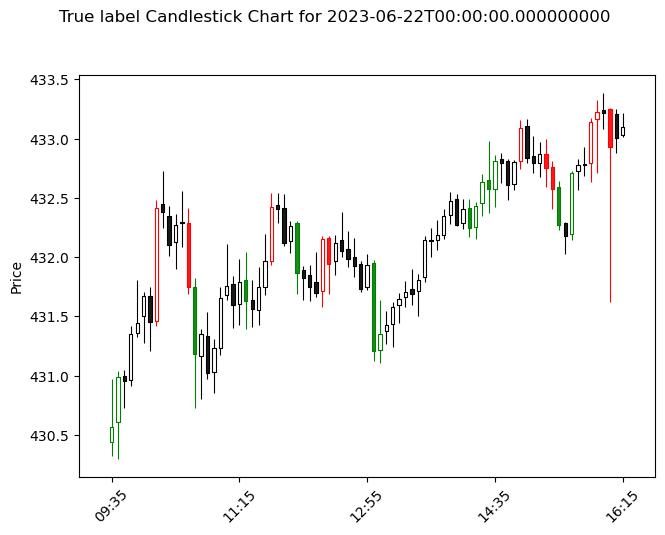

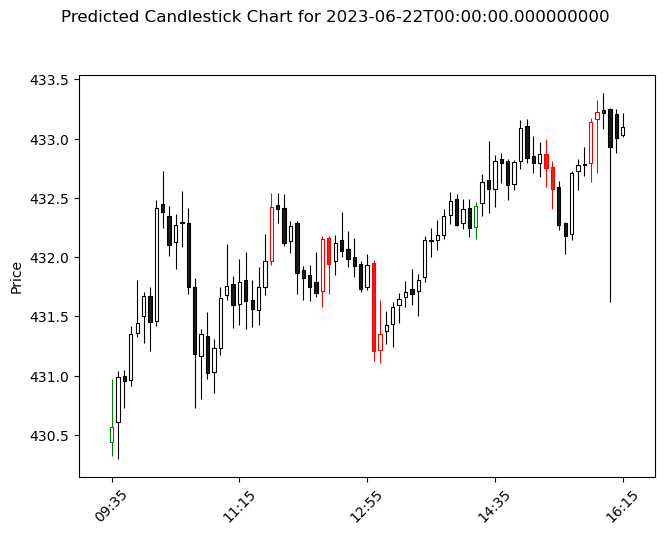

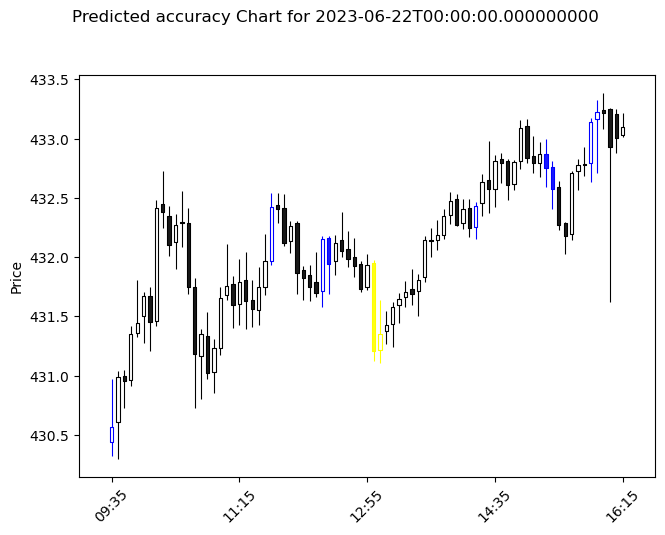

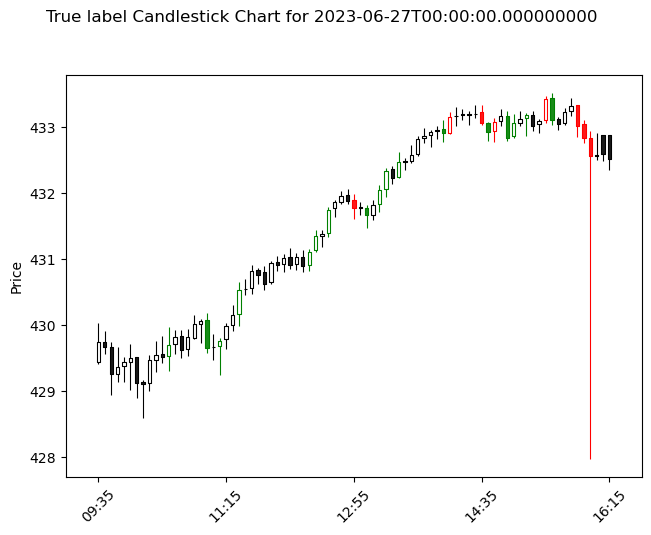

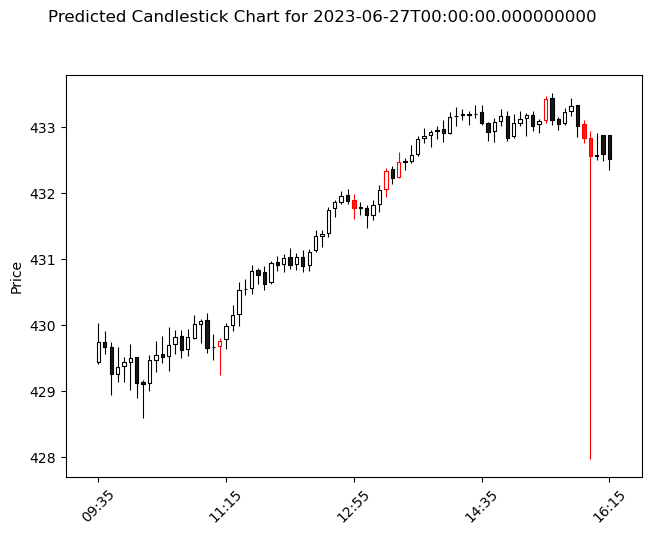

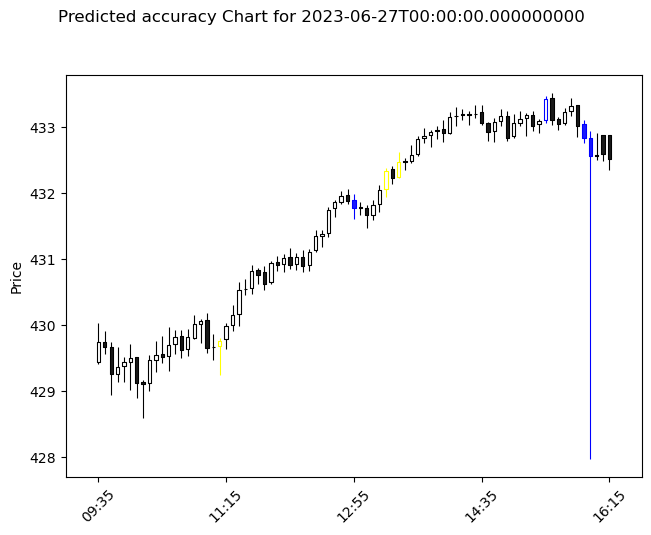

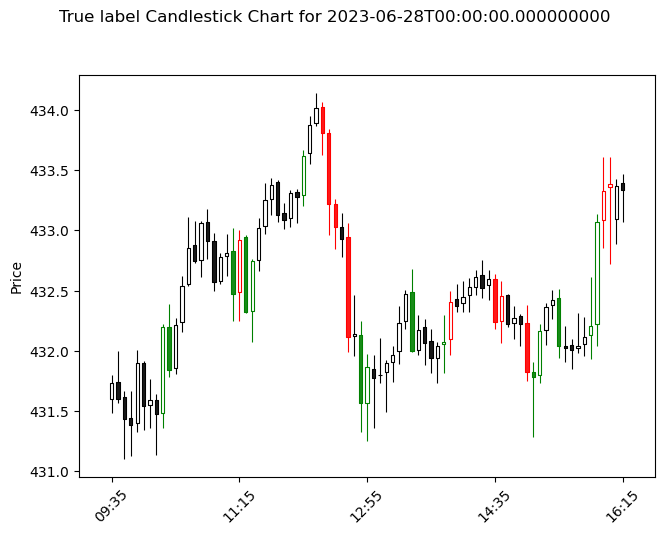

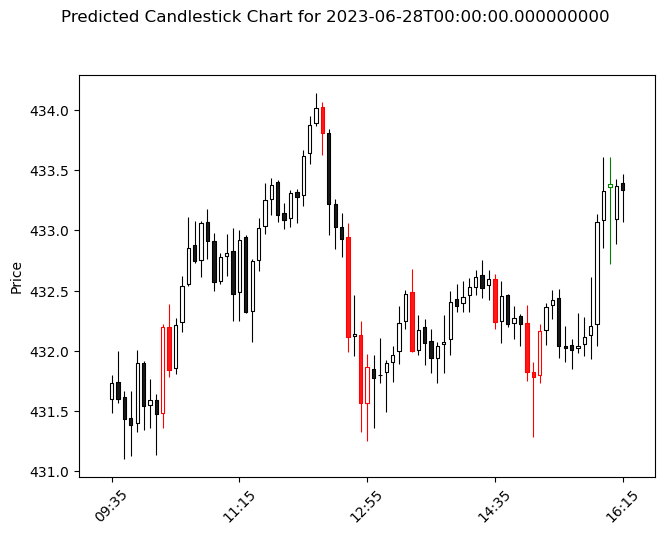

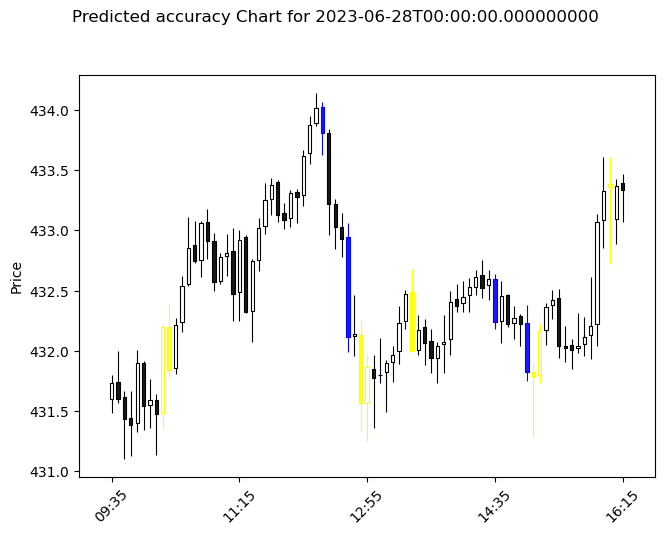

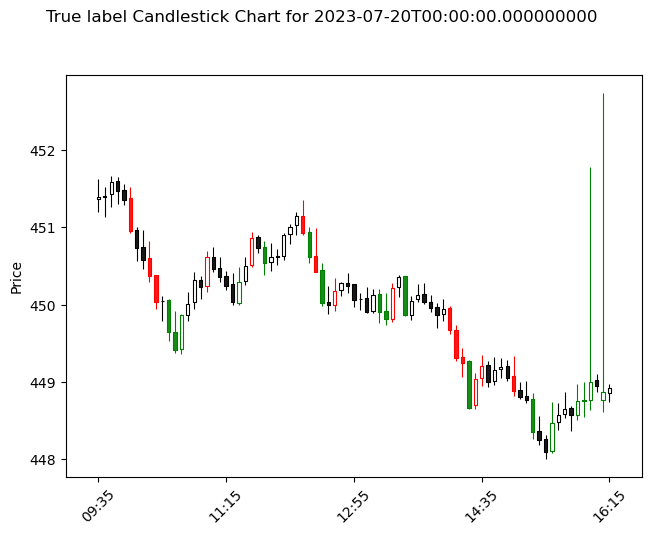

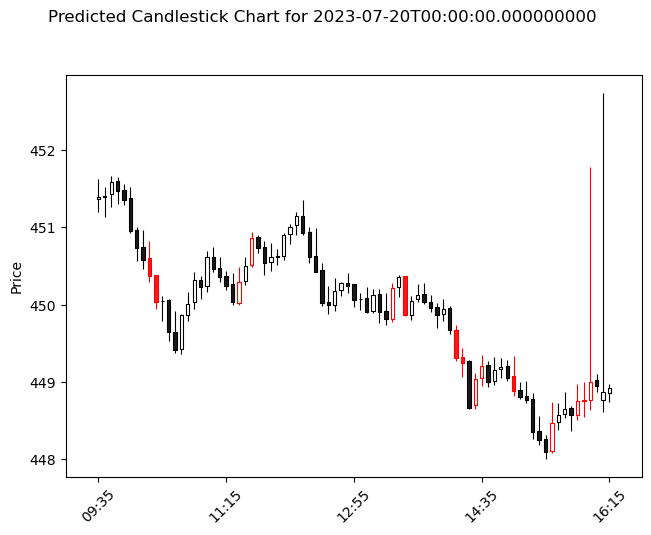

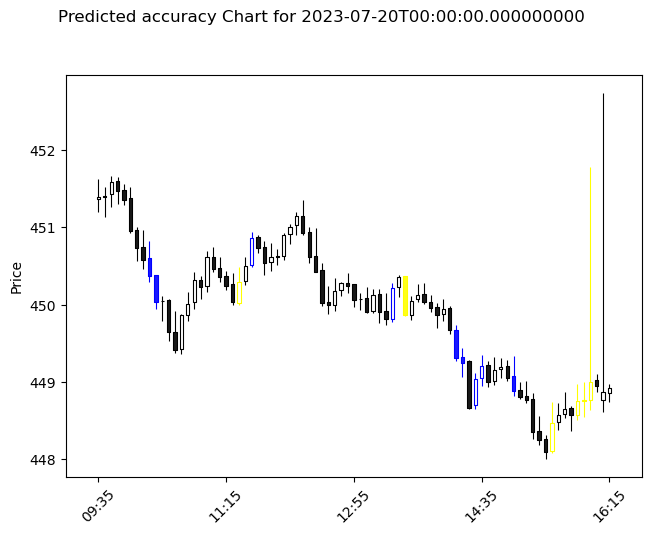

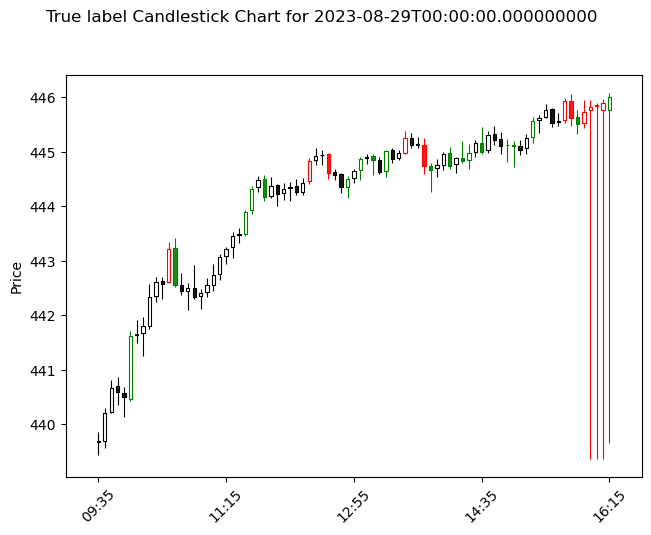

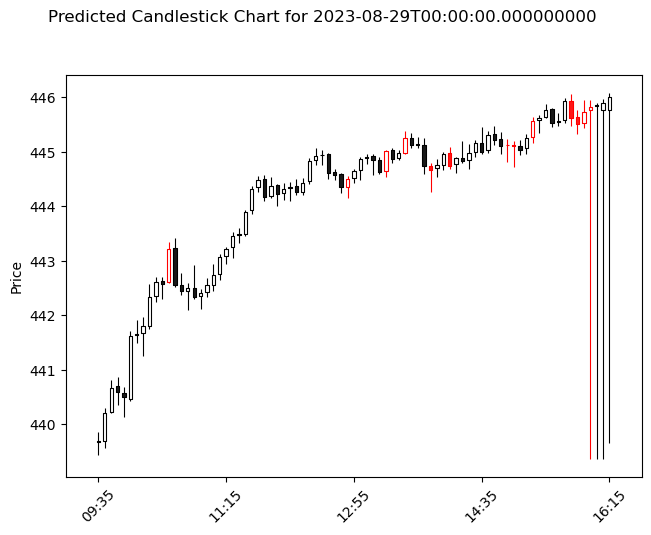

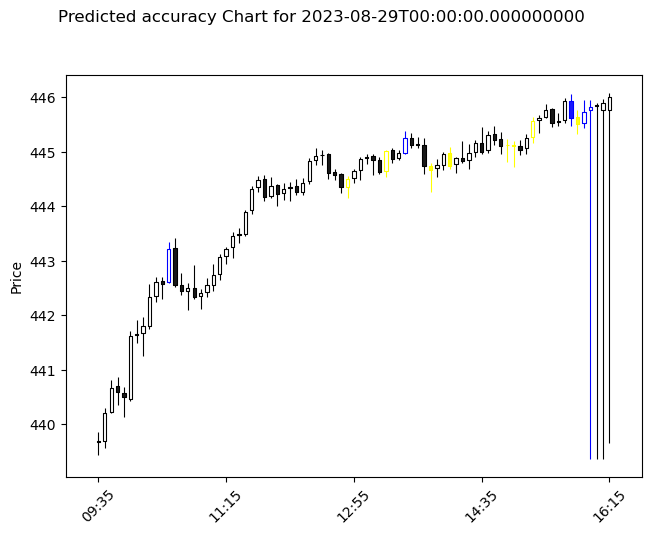

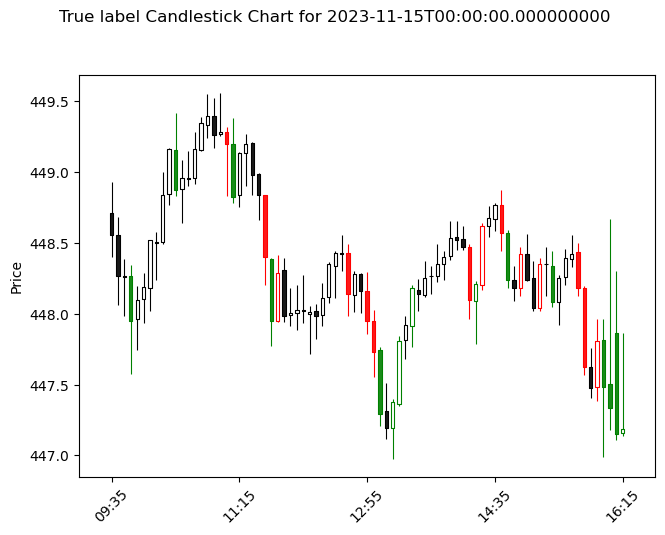

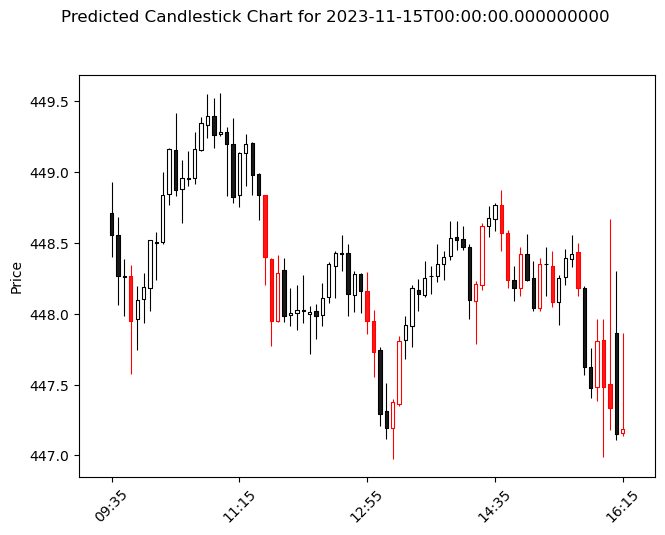

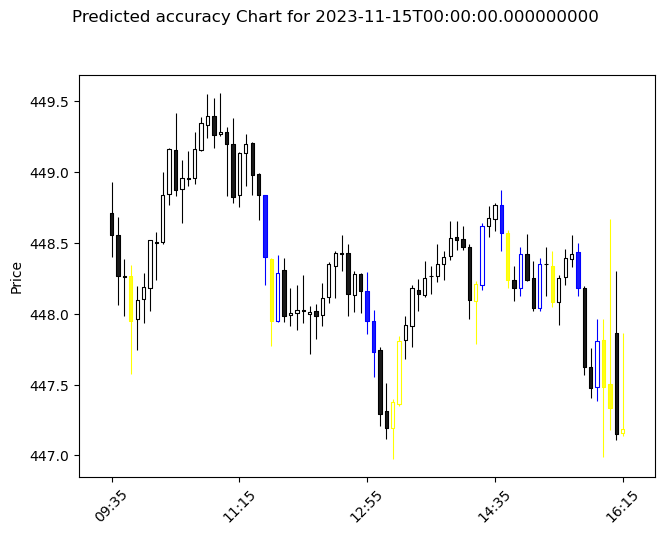

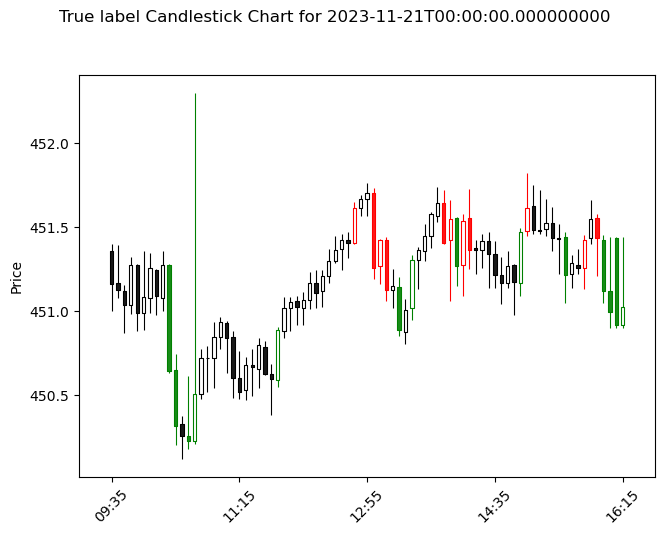

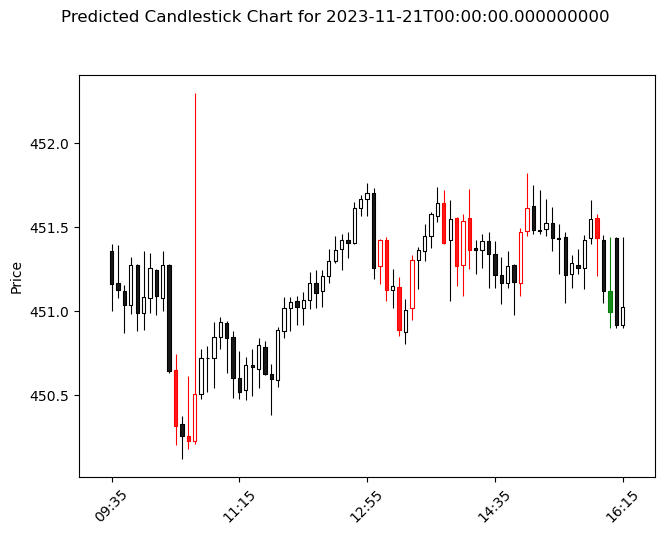

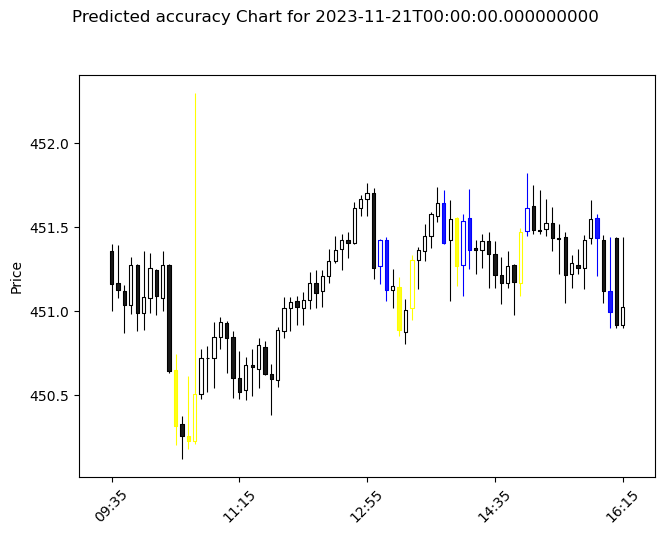

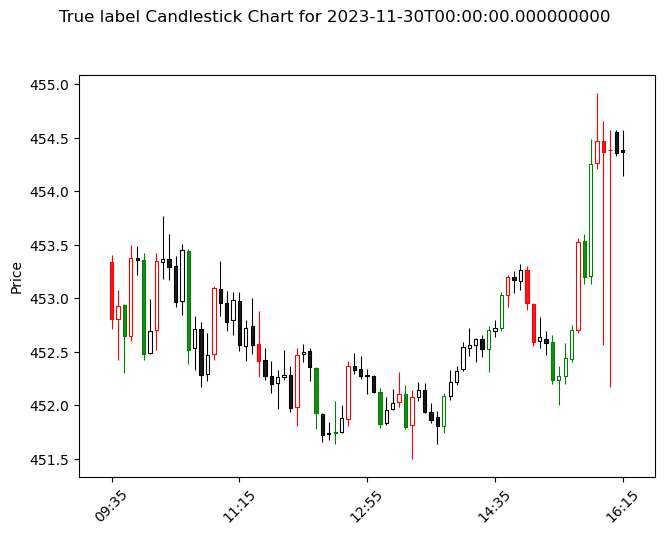

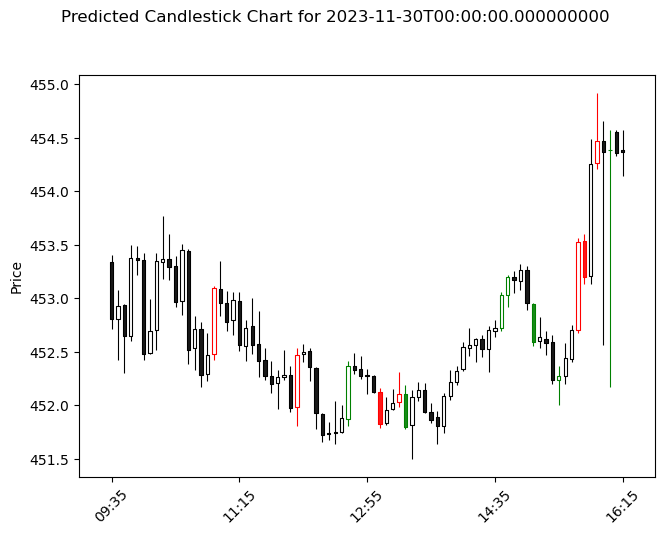

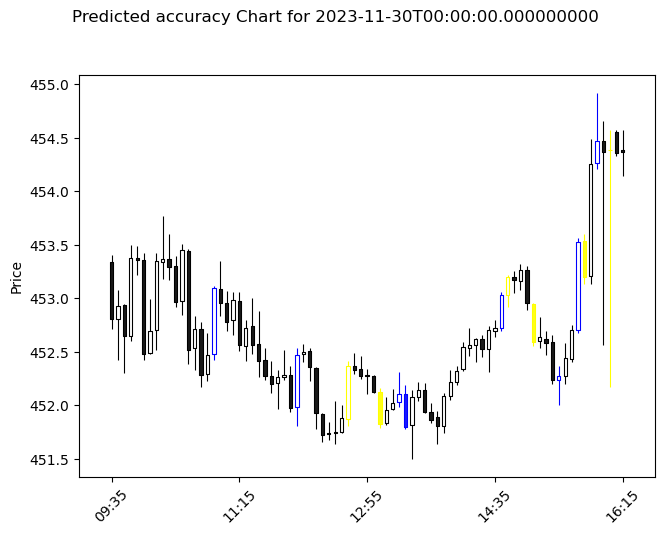

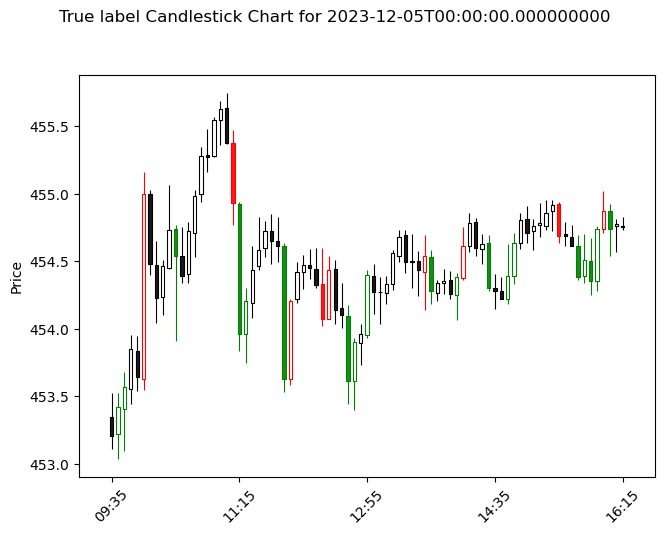

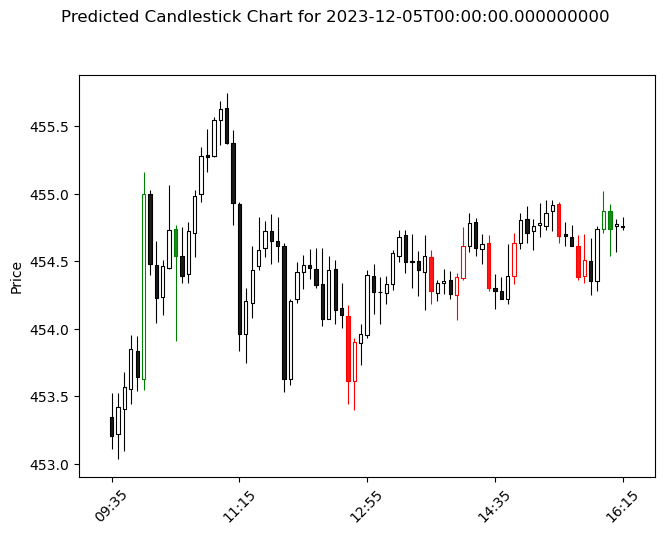

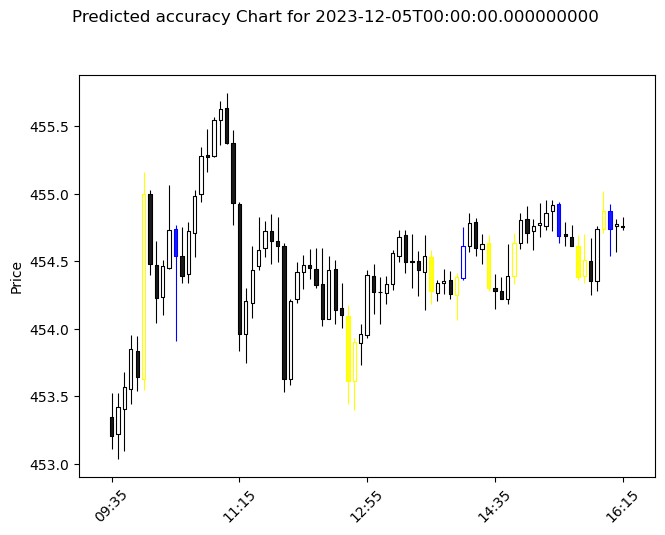

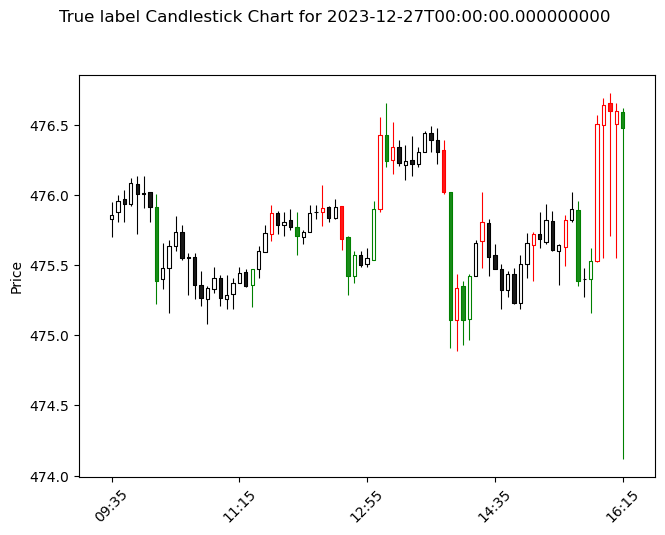

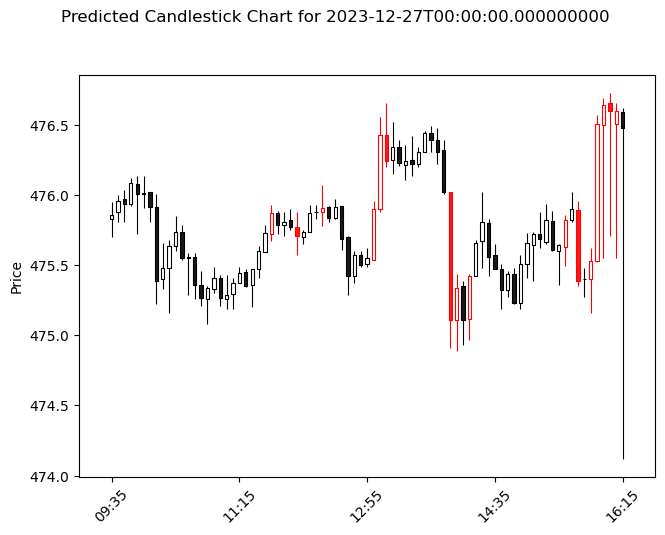

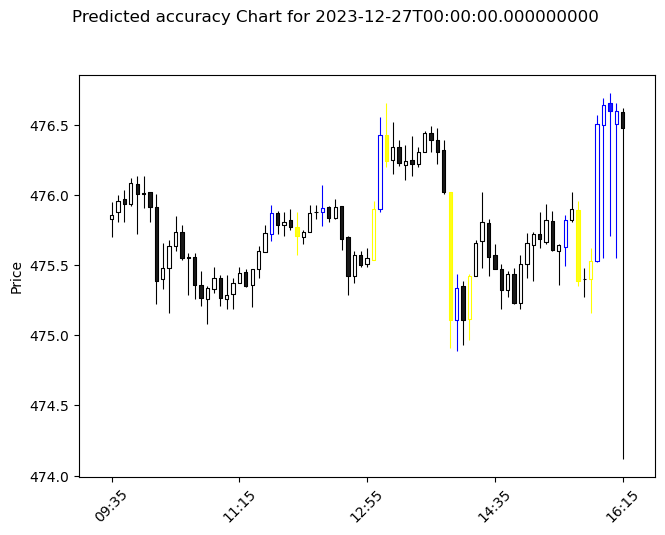

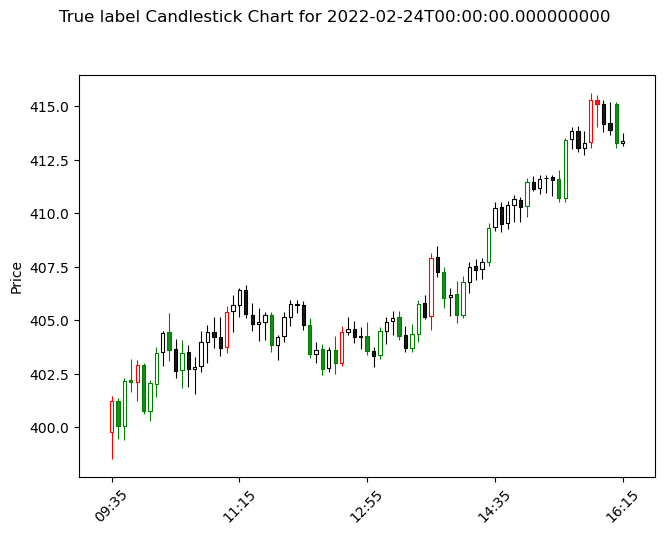

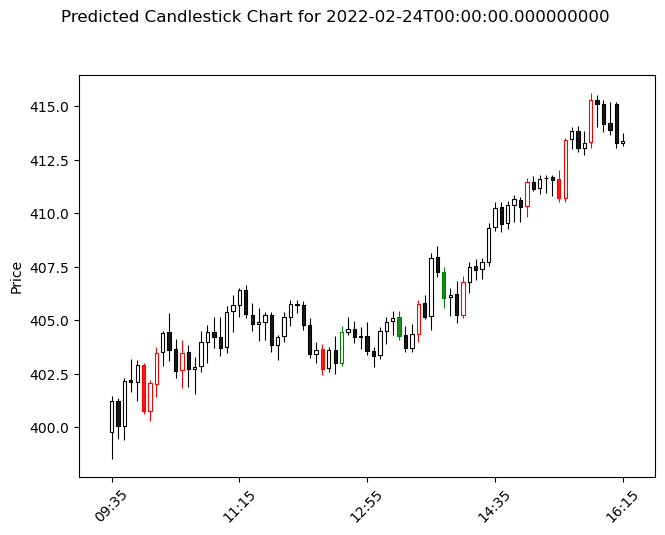

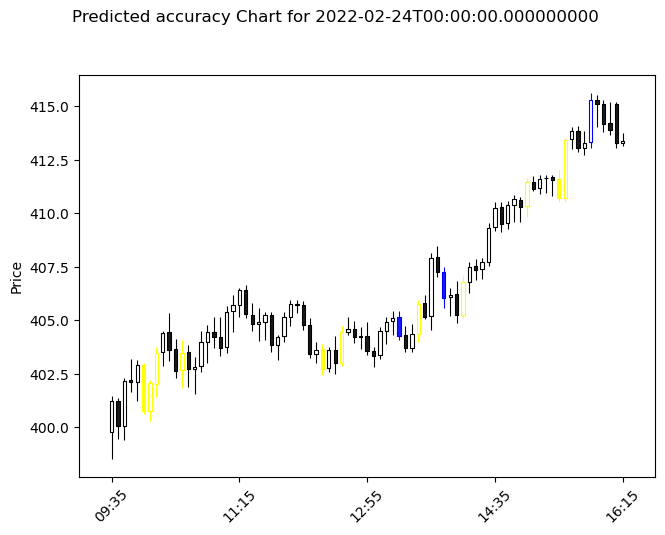

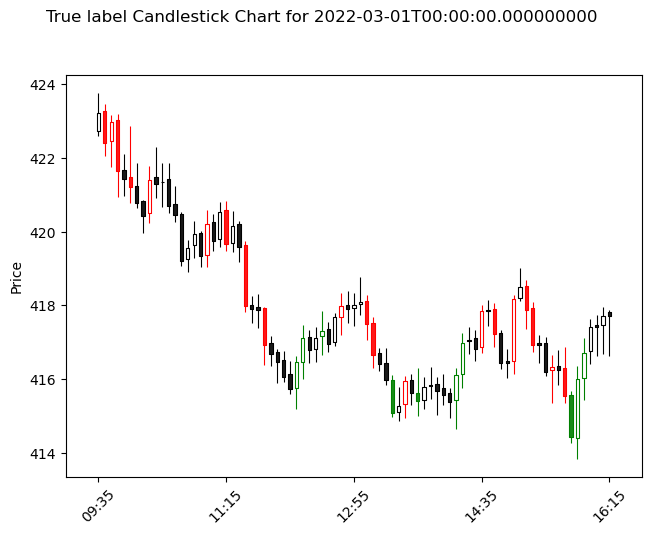

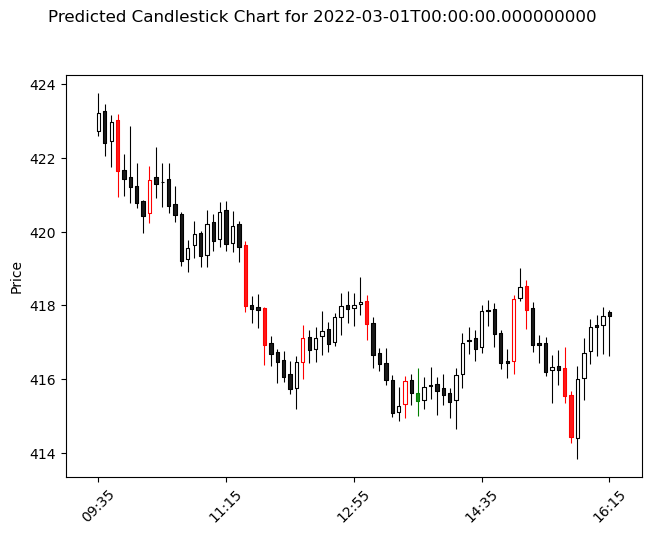

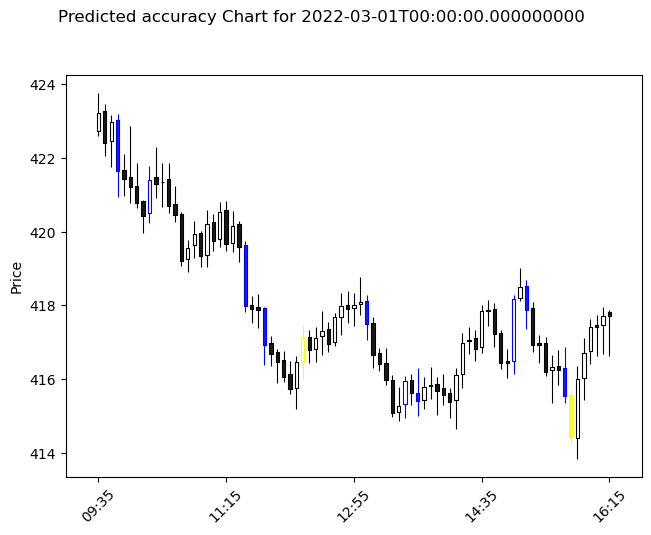

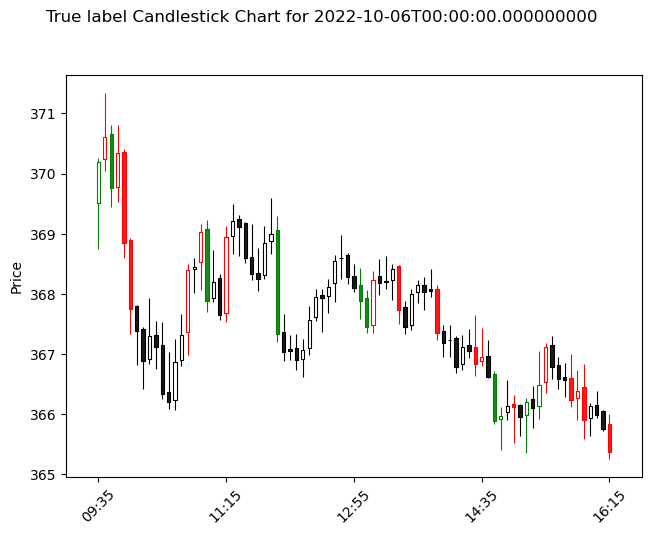

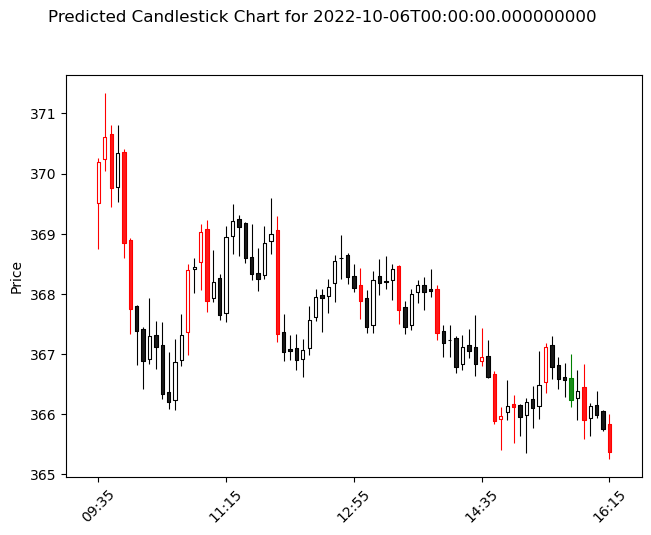

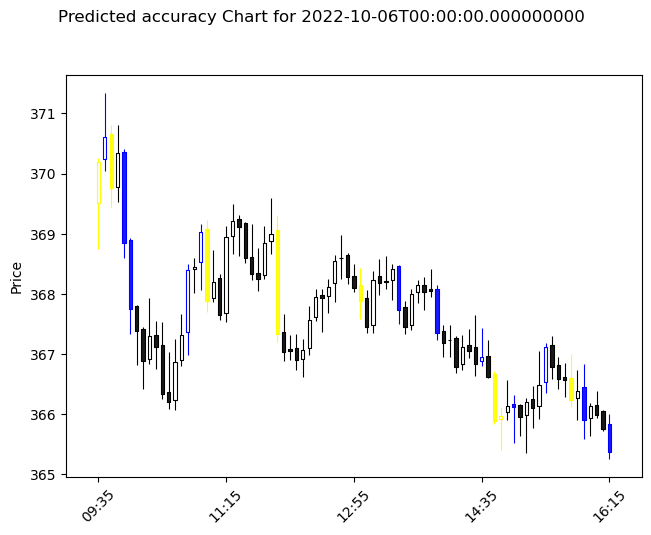

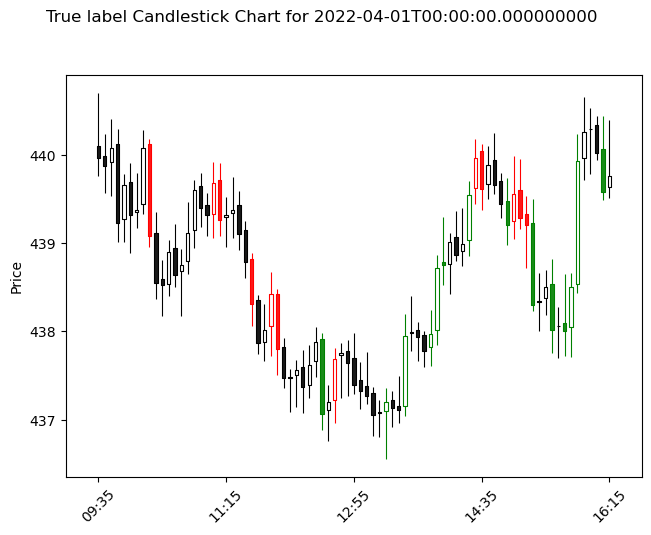

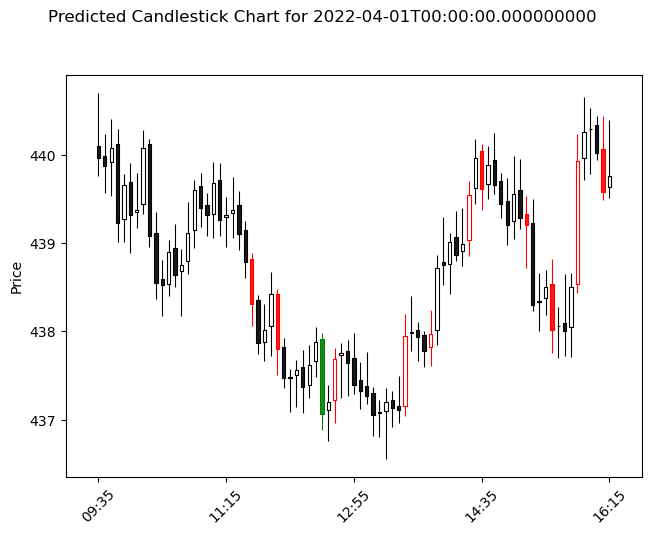

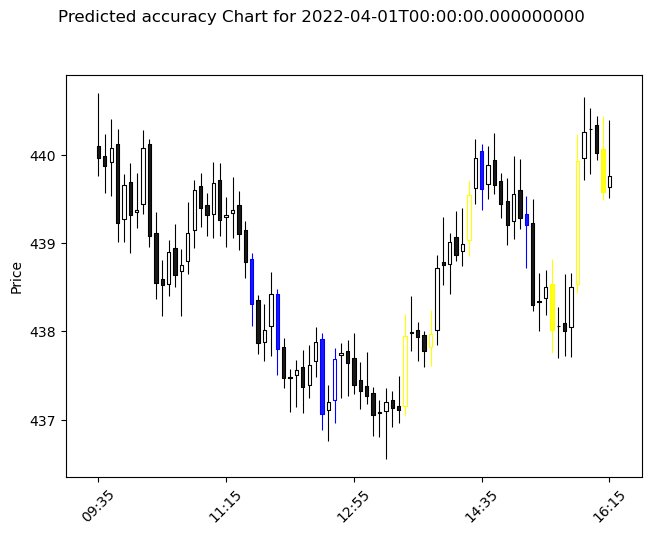

In [22]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np
import mplfinance as mpf


# Iterate over each unique date to create separate plots
for unique_date in unique_dates:
    # Filter data for the current date
    daily_data = test_data[test_data['Date'] == unique_date]

    # Create figure and axes
    # fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)
    # Plot candlestick chart for true labels
    color_override = []
    for date, row in daily_data.iterrows():
        mc = mpf.make_marketcolors(up='white',down='k',
                                    edge='k',
                                    wick={'up':'k','down':'k'},
                                    volume='gray',
                                    ohlc='black')
        if row['label'] == 1 and row['highlight']:
            mc = mpf.make_marketcolors(up='white',down='green',
                                    edge='green',
                                    wick={'up':'green','down':'green'},
                                    volume='gray',
                                    ohlc='black')
        elif row['label'] == -1 and row['highlight']:
            mc = mpf.make_marketcolors(up='white',down='red',
                                    edge='red',
                                    wick={'up':'red','down':'red'},
                                    volume='gray',
                                    ohlc='black')
        color_override.append(mc)
    style  = mpf.make_mpf_style(marketcolors=mc)    
    # Plot ATR
    mpf.plot(daily_data, style=style, type='candle', marketcolor_overrides=color_override,title=f'True label Candlestick Chart for {unique_date}')

    # Plot candlestick chart for predicted labels
    color_override = []
    for date, row in daily_data.iterrows():
        mc = mpf.make_marketcolors(up='white',down='k',
                                    edge='k',
                                    wick={'up':'k','down':'k'},
                                    volume='gray',
                                    ohlc='black')
        if row['Predicted_Label'] == 1 and row['highlight']:
            mc = mpf.make_marketcolors(up='white',down='green',
                                    edge='green',
                                    wick={'up':'green','down':'green'},
                                    volume='gray',
                                    ohlc='black')
        elif row['Predicted_Label'] == -1 and row['highlight']:
            mc = mpf.make_marketcolors(up='white',down='red',
                                    edge='red',
                                    wick={'up':'red','down':'red'},
                                    volume='gray',
                                    ohlc='black')
            
        color_override.append(mc)
    style  = mpf.make_mpf_style(marketcolors=mc)    
    # Plot ATR
    mpf.plot(daily_data, style=style, type='candle', marketcolor_overrides=color_override,title=f'Predicted Candlestick Chart for {unique_date}')
    
    
    
    color_override = []
    for date, row in daily_data.iterrows():
        mc = mpf.make_marketcolors(up='white',down='k',
                                    edge='k',
                                    wick={'up':'k','down':'k'},
                                    volume='gray',
                                    ohlc='black')
        if row['Predicted_Label'] == 1 or row['Predicted_Label'] == -1:
            if row['Predicted_Label'] == row['label'] and row['highlight']:
                mc = mpf.make_marketcolors(up='white',down='blue',
                                        edge='blue',
                                        wick={'up':'blue','down':'blue'},
                                        volume='gray',
                                        ohlc='black')
            elif row['Predicted_Label'] != row['label'] and row['highlight']:
                mc = mpf.make_marketcolors(up='white',down='yellow',
                                        edge='yellow',
                                        wick={'up':'yellow','down':'yellow'},
                                        volume='gray',
                                        ohlc='black')
            
        color_override.append(mc)
    style  = mpf.make_mpf_style(marketcolors=mc)    
    # Plot ATR
    mpf.plot(daily_data, style=style, type='candle', marketcolor_overrides=color_override,title=f'Predicted accuracy Chart for {unique_date}')